In [1]:
!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [ ]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.impute import SimpleImputer

from sklearn import metrics

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import time

from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import GridSearchCV
import joblib


In [ ]:
data = pd.read_csv('path/CIC2017_1132_features_extrated.csv', low_memory=False)



In [7]:
data.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Idle Min_ARIMA_forecast_2,Idle Min_ARIMA_forecast_3,Idle Min_ARIMA_forecast_4,Idle Min_ARIMA_forecast_5,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,1.104441e+06,979028.757647,926504.082905,893188.591632,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,9.790288e+05,926504.082905,893188.591632,873763.115207,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,9.265041e+05,893188.591632,873763.115207,860453.163786,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,8.931886e+05,873763.115207,860453.163786,851986.646158,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,8.737631e+05,860453.163786,851986.646158,846199.079134,0.0,0.0,0.0,0.0,0.0,Benign


In [8]:
feature_selected = 100

In [9]:
colunas_para_dropar = [coluna for coluna in data.columns if 'ARIMA'in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Dst Port_ARIMA_fitted_5', 'Dst Port_ARIMA_resid_5', 'Dst Port_ARIMA_forecast_1', 'Dst Port_ARIMA_forecast_2', 'Dst Port_ARIMA_forecast_3', 'Dst Port_ARIMA_forecast_4', 'Dst Port_ARIMA_forecast_5', 'Flow Duration_ARIMA_fitted_5', 'Flow Duration_ARIMA_resid_5', 'Flow Duration_ARIMA_forecast_1', 'Flow Duration_ARIMA_forecast_2', 'Flow Duration_ARIMA_forecast_3', 'Flow Duration_ARIMA_forecast_4', 'Flow Duration_ARIMA_forecast_5', 'Tot Fwd Pkts_ARIMA_fitted_5', 'Tot Fwd Pkts_ARIMA_resid_5', 'Tot Fwd Pkts_ARIMA_forecast_1', 'Tot Fwd Pkts_ARIMA_forecast_2', 'Tot Fwd Pkts_ARIMA_forecast_3', 'Tot Fwd Pkts_ARIMA_forecast_4', 'Tot Fwd Pkts_ARIMA_forecast_5', 'Tot Bwd Pkts_ARIMA_fitted_5', 'Tot Bwd Pkts_ARIMA_resid_5', 'Tot Bwd Pkts_ARIMA_forecast_1', 'Tot Bwd Pkts_ARIMA_forecast_2', 'Tot Bwd Pkts_ARIMA_forecast_3', 'Tot Bwd Pkts_ARIMA_forecast_4', 'Tot Bwd Pkts_ARIMA_forecast_5', 'TotLen Fwd Pkts_ARIMA_fitted_5', 'TotLen Fwd Pkts_ARIMA_resid_5', 'TotLen Fwd Pk

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [10]:
colunas_para_dropar = [coluna for coluna in data.columns if 'holder'in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)
data.head()


Colunas encontradas para remover:
['Bwd IAT Mean_holder_j5', 'Bwd IAT Min_holder_j5', 'Fwd Seg Size Min_holder_j5', 'Active Mean_holder_j5', 'Active Min_holder_j5']


,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_j30,ECE Flag Cnt_j30_mean,ECE Flag Cnt_entropy_j30,ECE Flag Cnt_j40,ECE Flag Cnt_j40_mean,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [12]:
dt = data.copy()
dt.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_j30,ECE Flag Cnt_j30_mean,ECE Flag Cnt_entropy_j30,ECE Flag Cnt_j40,ECE Flag Cnt_j40_mean,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [13]:
label = dt['Label']

In [14]:
print(f'Linhas: {dt.shape[0]}')
print(f'Colunas: {dt.shape[1]}')

Linhas: 16497
Colunas: 714


In [ ]:

names = ['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']
# Map string labels to numerical values before getting unique values
label_map = {'Benign': 0, 'DoS attacks-Slowloris': 1, 'DoS attacks-SlowHTTPTest': 2}
data['Label'] = data['Label'].map(label_map)

classes = [names[i] for i in data['Label'].unique()]
index = np.arange(len(classes))
classes

['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']

Text(0.5, 1.02, 'Contagem de Amostras por Classe')

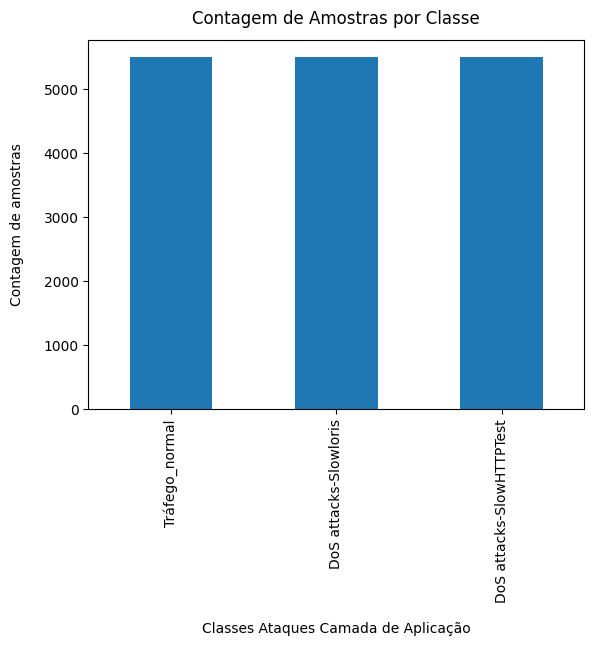

In [ ]:

df_visualization = data.copy()
df_visualization['Label'] = df_visualization['Label'].apply(lambda x:classes[x] )
df_visualization['Label'].value_counts().plot.bar(x = 'count', y = 'Label' )

plt.xlabel("Classes Ataques Camada de Aplicação", labelpad=14)
plt.ylabel("Contagem de amostras", labelpad=14)
plt.title("Contagem de Amostras por Classe", y=1.02)

In [ ]:
dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'].value_counts()

/tmp/ipython-input-1711437954.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)


,count
Label,
0,5499
1,5499
2,5499


In [ ]:
y = dt['Label']
x_data = data.drop(['Label'],axis=1)
x_data.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_entropy_j20,ECE Flag Cnt_j30,ECE Flag Cnt_j30_mean,ECE Flag Cnt_entropy_j30,ECE Flag Cnt_j40,ECE Flag Cnt_j40_mean,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
inputs = len(data.columns)
print('Número de entradas: ', inputs)

Número de entradas:  714


In [ ]:
x = x_data
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

selector = SelectKBest(score_func=f_classif, k=feature_selected)  
newfeature = selector.fit_transform(x, y)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 43  44  45  46  47  48 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:

cols = selector.get_support(indices=True)
newfeature = dt.iloc[:,cols]

In [26]:
newfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16497 entries, 0 to 16496
Data columns (total 100 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fwd Seg Size Min          16497 non-null  int64  
 1   Active Mean               16497 non-null  float64
 2   Active Min                16497 non-null  int64  
 3   Dst Port_SMA_6            16497 non-null  float64
 4   Dst Port_EMA_6            16497 non-null  float64
 5   Dst Port_SMA_9            16497 non-null  float64
 6   Dst Port_EMA_9            16497 non-null  float64
 7   Dst Port_SMA_12           16497 non-null  float64
 8   Dst Port_EMA_12           16497 non-null  float64
 9   Bwd Pkt Len Max_SMA_3     16497 non-null  float64
 10  Bwd Pkt Len Max_EMA_3     16497 non-null  float64
 11  Bwd Pkt Len Max_SMA_6     16497 non-null  float64
 12  Bwd Pkt Len Max_EMA_6     16497 non-null  float64
 13  Bwd Pkt Len Max_SMA_9     16497 non-null  float64
 14  Bwd P

In [27]:
rotulos = newfeature.columns
print(rotulos)

Index(['Fwd Seg Size Min', 'Active Mean', 'Active Min', 'Dst Port_SMA_6',
       'Dst Port_EMA_6', 'Dst Port_SMA_9', 'Dst Port_EMA_9', 'Dst Port_SMA_12',
       'Dst Port_EMA_12', 'Bwd Pkt Len Max_SMA_3', 'Bwd Pkt Len Max_EMA_3',
       'Bwd Pkt Len Max_SMA_6', 'Bwd Pkt Len Max_EMA_6',
       'Bwd Pkt Len Max_SMA_9', 'Bwd Pkt Len Max_EMA_9',
       'Bwd Pkt Len Max_SMA_12', 'Bwd Pkt Len Max_EMA_12',
       'Bwd Pkt Len Mean_SMA_3', 'Bwd Pkt Len Mean_EMA_3',
       'Bwd Pkt Len Mean_SMA_6', 'Bwd Pkt Len Mean_EMA_6',
       'Bwd Pkt Len Mean_SMA_9', 'Bwd Pkt Len Mean_EMA_9',
       'Bwd Pkt Len Mean_SMA_12', 'Bwd Pkt Len Mean_EMA_12',
       'Bwd Pkt Len Std_SMA_6', 'Bwd Pkt Len Std_EMA_6',
       'Bwd Pkt Len Std_SMA_9', 'Bwd Pkt Len Std_EMA_9',
       'Bwd Pkt Len Std_SMA_12', 'Bwd Pkt Len Std_EMA_12',
       'Bwd IAT Mean_EMA_9', 'Bwd IAT Mean_SMA_12', 'Bwd IAT Mean_EMA_12',
       'Bwd IAT Min_EMA_6', 'Bwd IAT Min_SMA_9', 'Bwd IAT Min_EMA_9',
       'Bwd IAT Min_SMA_12', 'Bwd IAT Min

In [28]:
data_save = data[rotulos]
data_save.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j10,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50
0,20,0.0,0,80.000000,80.000000,80.000000,80.0000,80.000000,80.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,0.0,0,234.500000,168.285714,234.500000,141.8000,234.500000,127.538462,84.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32,0.0,0,185.666667,145.346939,185.666667,131.0400,185.666667,121.455621,581.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,0.0,0,236.500000,214.962099,236.500000,182.6320,236.500000,162.616295,1602.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0.0,0,206.800000,178.687214,206.800000,163.7056,206.800000,151.136865,2073.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data_save = pd.concat([data_save, label], axis=1)
data_save.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Label
0,20,0.0,0,80.000000,80.000000,80.000000,80.0000,80.000000,80.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,32,0.0,0,234.500000,168.285714,234.500000,141.8000,234.500000,127.538462,84.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,32,0.0,0,185.666667,145.346939,185.666667,131.0400,185.666667,121.455621,581.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,32,0.0,0,236.500000,214.962099,236.500000,182.6320,236.500000,162.616295,1602.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,32,0.0,0,206.800000,178.687214,206.800000,163.7056,206.800000,151.136865,2073.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
try:
    data_save.to_csv('/poseiddon/GROUP A/CONFIGURATION 5/ST_new_features.csv', index=False)
    print("\nDataset salvo com sucesso como 'ST_new_features.csv'")
except Exception as e:
    print(f"\nOcorreu um erro ao salvar o CSV: {e}")


Dataset salvo com sucesso como 'ST_new_features.csv'


In [ ]:
x = newfeature.copy() 
x = x.replace([zp.inf, -np.inf], np.nan)
x = x.fillna(0)

In [ ]:
corr = x.corr()
corr

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j10,PSH Flag Cnt_entropy_j20,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50
Fwd Seg Size Min,1.000000,0.513041,0.521658,-0.407817,-0.418980,-0.454441,-0.463700,-0.492005,-0.495643,-0.471346,...,-0.636172,-0.649218,-0.637454,-0.627560,-0.622045,-0.612067,-0.629381,-0.613895,-0.601825,-0.594266
Active Mean,0.513041,1.000000,0.887552,-0.222817,-0.232375,-0.244811,-0.253310,-0.261486,-0.268212,-0.264132,...,-0.428183,-0.479892,-0.507088,-0.530581,-0.549169,-0.418085,-0.475239,-0.502258,-0.525201,-0.543129
Active Min,0.521658,0.887552,1.000000,-0.170156,-0.176225,-0.186524,-0.192399,-0.198897,-0.203788,-0.200434,...,-0.366129,-0.432012,-0.478339,-0.515283,-0.544514,-0.359516,-0.430520,-0.477937,-0.515122,-0.544271
Dst Port_SMA_6,-0.407817,-0.222817,-0.170156,1.000000,0.948176,0.917243,0.958876,0.840907,0.942953,0.131934,...,0.369412,0.364343,0.348876,0.337711,0.327768,0.419141,0.400128,0.371871,0.350349,0.333947
Dst Port_EMA_6,-0.418980,-0.232375,-0.176225,0.948176,1.000000,0.892111,0.985411,0.836480,0.959503,0.123694,...,0.379375,0.374253,0.359204,0.347804,0.337642,0.424572,0.408029,0.380435,0.359097,0.342718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACK Flag Cnt_entropy_j10,-0.612067,-0.418085,-0.359516,0.419141,0.424572,0.475597,0.472180,0.512658,0.503365,0.335999,...,0.942607,0.809666,0.724905,0.675397,0.644745,1.000000,0.835946,0.736237,0.677915,0.643043
ACK Flag Cnt_entropy_j20,-0.629381,-0.475239,-0.430520,0.400128,0.408029,0.448553,0.453364,0.483900,0.484844,0.339998,...,0.817943,0.965910,0.896200,0.824325,0.777935,0.835946,1.000000,0.916037,0.835214,0.782945
ACK Flag Cnt_entropy_j30,-0.613895,-0.502258,-0.477937,0.371871,0.380435,0.415772,0.421994,0.448491,0.451401,0.321250,...,0.727142,0.892320,0.973945,0.930172,0.876467,0.736237,0.916037,1.000000,0.947711,0.888151
ACK Flag Cnt_entropy_j40,-0.601825,-0.525201,-0.515122,0.350349,0.359097,0.391100,0.397971,0.421899,0.425731,0.308393,...,0.674028,0.817198,0.926252,0.978479,0.949444,0.677915,0.835214,0.947711,1.000000,0.965651


In [ ]:
corr = x.corr()
colormap = sns.diverging_palette(10, 150, as_cmap = True)
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            cmap = colormap, linewidths=0.5, linecolor='white')
plt.title('Corelação de Recursos', y=1.05, size=16)

Output hidden; open in https://colab.research.google.com to view.

In [34]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [35]:
# Seperação dos dados em teino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

print(f'Treinamento: {x_train.shape[0]}  ---  {(x_train.shape[0]/x.shape[0])*100:.2f}%')
print(f'Teste: {x_test.shape[0]}  ---  {(x_test.shape[0]/x.shape[0])*100:.2f}%')

Treinamento: 13197  ---  80.00%
Teste: 3300  ---  20.00%


In [36]:
# Importamos as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras
import tensorflow as tf
from keras.metrics import Precision, Recall, F1Score, SparseCategoricalAccuracy # [1]

In [37]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


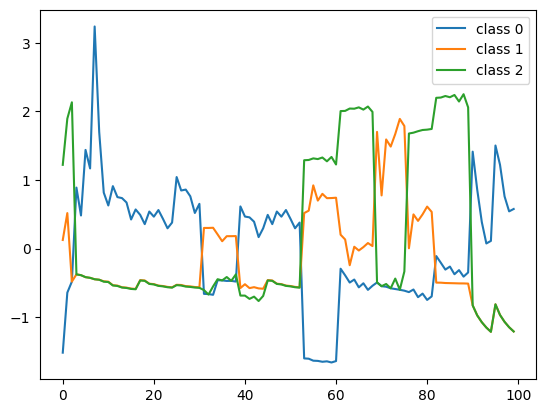

In [38]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
metricas_scoring = {
    "Accuracy": "accuracy",
    "Precision": "precision_weighted",
    "Recall": "recall_weighted",
    "F1-Score": "f1_weighted"
}

all_scores_cv = {nome_metrica: {} for nome_metrica in metricas_scoring.keys()}

In [40]:
y_train_lstm = y_train.copy()
y_test_lstm = y_test.copy()
x_train_lstm = x_train.copy()
x_test_lstm = x_test.copy()

In [41]:
x_train_lstm = x_train_lstm.reshape((x_train_lstm.shape[0], x_train_lstm.shape[1], 1))
x_test_lstm = x_test_lstm.reshape((x_test_lstm.shape[0], x_test_lstm.shape[1], 1))

In [42]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


In [43]:
def make_model(input_shape, dropout_rate=0.5):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv1 = keras.layers.Dropout(rate=dropout_rate)(conv1)

  conv2 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv2 = keras.layers.Dropout(rate=dropout_rate)(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  gap = keras.layers.Dropout(rate=dropout_rate)(gap)

  output_layer = keras.layers.Dense(num_classes, activation="sigmoid")(gap)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)


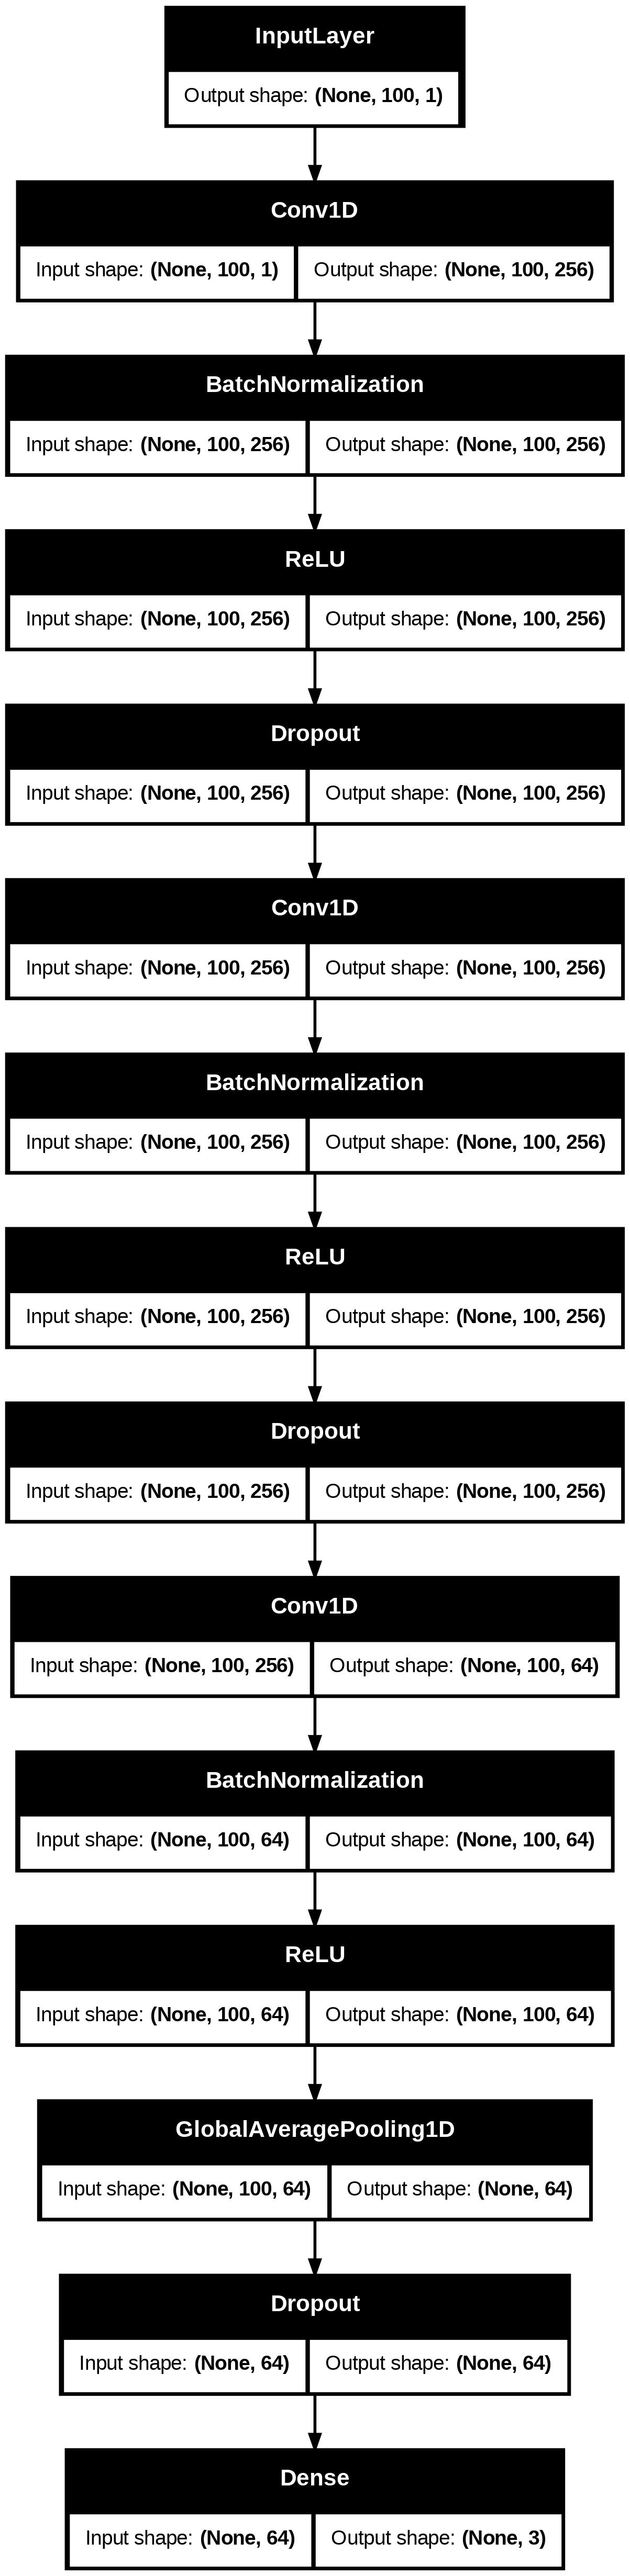

In [ ]:
model = make_model(input_shape=x_train_lstm.shape[1:])

keras.utils.plot_model(model, show_shapes=True)

In [77]:
n_folds = 10
epochs = 50
batch_size = 128

In [ ]:
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
loss_per_fold = []

In [72]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", mode='min', patience=10, restore_best_weights=True, verbose=1),
]

In [ ]:
if len(y_train_lstm.shape) == 1:
    y_train_lstm = np.expand_dims(y_train_lstm, axis=-1)

if len(y_test_lstm.shape) == 1:
    y_test_lstm = np.expand_dims(y_test_lstm, axis=-1)

print(f"Novo shape de y_train: {y_train_lstm.shape}")


Novo shape de y_train: (13197, 1)


In [ ]:
import tensorflow as tf

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

print("Dispositivos disponíveis:", tf.config.list_physical_devices())

if tf.config.list_physical_devices('GPU'):
    print("\n✅ GPU detectada e disponível para uso.")
    print("Nome da GPU:", tf.test.gpu_device_name())
else:
    print("\n❌ GPU não detectada. Verifique as configurações de Runtime.")

Dispositivos disponíveis: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

✅ GPU detectada e disponível para uso.
Nome da GPU: /device:GPU:0


In [75]:
from tqdm import tqdm

In [ ]:
from tensorflow.keras.optimizers import Adam

initial_learning_rate = 0.05 

optimizer = Adam(learning_rate=initial_learning_rate)

In [ ]:

fold_no = 1
for train_index, val_index in tqdm(kf.split(x_train_lstm, y_train_lstm)):
    print(f'----------------- Fold {fold_no}/{n_folds} -----------------')

    X_train_fold, X_val_fold = x_train_lstm[train_index], x_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]
    model = make_model(input_shape=x_train_lstm.shape[1:])

    optimizer_fold = Adam(learning_rate=initial_learning_rate)

    model.compile(
      optimizer=optimizer_fold, 
      loss="sparse_categorical_crossentropy",
      metrics=[
          SparseCategoricalAccuracy(name='accuracy'),
      ],
    )

    print('Treinando...')
    history = model.fit(
      X_train_fold, 
      Y_train_fold, 
      batch_size=batch_size,
      epochs=epochs,
      callbacks=callbacks,
      validation_data=(X_val_fold, Y_val_fold),
      verbose=1,
    )

    print('Avaliando performance...')
    loss = history.history['val_loss'][-1]
    accuracy_val = history.history['val_accuracy'][-1]
    y_pred_probs = model.predict(X_val_fold, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.squeeze(Y_val_fold) 
    print(f'Loss: {loss:.4f}, Accuracy: {accuracy_val:.4f}')

    fold_no += 1

0it [00:00, ?it/s]

----------------- Fold 1/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.6764 - loss: 0.7260 - val_accuracy: 0.5288 - val_loss: 1.0630 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.8705 - loss: 0.3230 - val_accuracy: 0.8288 - val_loss: 0.3867 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.8903 - loss: 0.2651 - val_accuracy: 0.7924 - val_loss: 0.4527 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9076 - loss: 0.2309 - val_accuracy: 0.7864 - val_loss: 0.5339 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9142 - loss: 0.2189 - val_accuracy: 0.9152 - val_loss: 0.2471 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9216 - loss: 0.1925 - val_accuracy: 0.9121 - val_loss: 0.2324 - learning_rate: 0.0500
Epoch 7/50
93/93 ━━━━━━

1it [10:37, 637.73s/it]

Loss: 0.1046, Accuracy: 0.9682
----------------- Fold 2/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.5862 - loss: 0.8859 - val_accuracy: 0.7152 - val_loss: 0.6324 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.8503 - loss: 0.3592 - val_accuracy: 0.8500 - val_loss: 0.3364 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.8618 - loss: 0.3221 - val_accuracy: 0.9114 - val_loss: 0.2470 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.8982 - loss: 0.2494 - val_accuracy: 0.7674 - val_loss: 0.5025 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - accuracy: 0.9005 - loss: 0.2437 - val_accuracy: 0.9205 - val_loss: 0.2272 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.9203 - loss: 0.2159 - val_accuracy: 0.9045 - val_loss: 0.2235 - learning_rate:

2it [21:09, 634.47s/it]

Loss: 0.0677, Accuracy: 0.9667
----------------- Fold 3/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.6667 - loss: 0.7495 - val_accuracy: 0.6023 - val_loss: 1.0035 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8405 - loss: 0.3725 - val_accuracy: 0.8295 - val_loss: 0.5157 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.8799 - loss: 0.2943 - val_accuracy: 0.7568 - val_loss: 0.5308 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - accuracy: 0.9033 - loss: 0.2473 - val_accuracy: 0.5712 - val_loss: 1.2028 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9183 - loss: 0.2056 - val_accuracy: 0.9538 - val_loss: 0.1714 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9241 - loss: 0.1963 - val_accuracy: 0.9500 - val_loss: 0.1391 - learning_rate:

3it [27:07, 507.94s/it]

Loss: 0.0776, Accuracy: 0.9689
----------------- Fold 4/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.6666 - loss: 0.7334 - val_accuracy: 0.6667 - val_loss: 0.6792 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8533 - loss: 0.3534 - val_accuracy: 0.8712 - val_loss: 0.3737 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.8725 - loss: 0.2966 - val_accuracy: 0.9235 - val_loss: 0.1838 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.9054 - loss: 0.2386 - val_accuracy: 0.8121 - val_loss: 0.5608 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.9177 - loss: 0.2116 - val_accuracy: 0.9606 - val_loss: 0.1191 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - accuracy: 0.9210 - loss: 0.2015 - val_accuracy: 0.9561 - val_loss: 0.1093 - learning_rate:

4it [35:58, 517.00s/it]

Loss: 0.0612, Accuracy: 0.9667
----------------- Fold 5/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.6608 - loss: 0.7323 - val_accuracy: 0.8795 - val_loss: 0.3894 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.8551 - loss: 0.3511 - val_accuracy: 0.5038 - val_loss: 1.2575 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.8886 - loss: 0.2716 - val_accuracy: 0.6159 - val_loss: 1.1371 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9059 - loss: 0.2335 - val_accuracy: 0.5061 - val_loss: 1.8074 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.9110 - loss: 0.2259 - val_accuracy: 0.6818 - val_loss: 0.7557 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.9296 - loss: 0.1820 - val_accuracy: 0.7462 - val_loss: 0.5564 - learning_rate:

5it [46:20, 555.08s/it]

Loss: 0.1101, Accuracy: 0.9583
----------------- Fold 6/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.6729 - loss: 0.7136 - val_accuracy: 0.3273 - val_loss: 2.3083 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8388 - loss: 0.3808 - val_accuracy: 0.9106 - val_loss: 0.2617 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8845 - loss: 0.2849 - val_accuracy: 0.8871 - val_loss: 0.3381 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - accuracy: 0.8991 - loss: 0.2474 - val_accuracy: 0.4129 - val_loss: 1.8679 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9144 - loss: 0.2205 - val_accuracy: 0.9197 - val_loss: 0.2784 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9132 - loss: 0.2000 - val_accuracy: 0.7455 - val_loss: 0.4736 - learning_rate:

6it [53:56, 521.26s/it]

Loss: 0.0682, Accuracy: 0.9811
----------------- Fold 7/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.6687 - loss: 0.7122 - val_accuracy: 0.4197 - val_loss: 1.0802 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8601 - loss: 0.3491 - val_accuracy: 0.5030 - val_loss: 0.9123 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.8902 - loss: 0.2699 - val_accuracy: 0.3614 - val_loss: 1.4281 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.8978 - loss: 0.2494 - val_accuracy: 0.4371 - val_loss: 1.5729 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9136 - loss: 0.2159 - val_accuracy: 0.9258 - val_loss: 0.1853 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9253 - loss: 0.1892 - val_accuracy: 0.9553 - val_loss: 0.1325 - learning_rate:

7it [1:03:31, 538.71s/it]

Loss: 0.0647, Accuracy: 0.9765
----------------- Fold 8/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.6568 - loss: 0.7636 - val_accuracy: 0.6308 - val_loss: 0.7438 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.8689 - loss: 0.3266 - val_accuracy: 0.8673 - val_loss: 0.3392 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8893 - loss: 0.2758 - val_accuracy: 0.3313 - val_loss: 3.3871 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.9036 - loss: 0.2337 - val_accuracy: 0.5421 - val_loss: 1.1325 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9178 - loss: 0.2004 - val_accuracy: 0.9393 - val_loss: 0.2040 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9272 - loss: 0.1941 - val_accuracy: 0.9242 - val_loss: 0.1972 - learning_rate:

8it [1:12:17, 534.80s/it]

Loss: 0.0848, Accuracy: 0.9636
----------------- Fold 9/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - accuracy: 0.6853 - loss: 0.7070 - val_accuracy: 0.3571 - val_loss: 2.3330 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.8493 - loss: 0.3658 - val_accuracy: 0.8893 - val_loss: 0.3316 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.8795 - loss: 0.2906 - val_accuracy: 0.9128 - val_loss: 0.2220 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.8992 - loss: 0.2452 - val_accuracy: 0.8544 - val_loss: 0.4808 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.9097 - loss: 0.2168 - val_accuracy: 0.6285 - val_loss: 0.7698 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.9203 - loss: 0.1912 - val_accuracy: 0.7582 - val_loss: 0.6305 - learning_rate:

9it [1:20:10, 515.35s/it]

Loss: 0.1037, Accuracy: 0.9553
----------------- Fold 10/10 -----------------
Treinando...
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.6346 - loss: 0.7987 - val_accuracy: 0.5898 - val_loss: 1.0106 - learning_rate: 0.0500
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8553 - loss: 0.3576 - val_accuracy: 0.6998 - val_loss: 0.5979 - learning_rate: 0.0500
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8793 - loss: 0.2839 - val_accuracy: 0.9014 - val_loss: 0.2707 - learning_rate: 0.0500
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.8985 - loss: 0.2400 - val_accuracy: 0.3851 - val_loss: 1.6019 - learning_rate: 0.0500
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9134 - loss: 0.2158 - val_accuracy: 0.8719 - val_loss: 0.2974 - learning_rate: 0.0500
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 133ms/step - accuracy: 0.9191 - loss: 0.1951 - val_accuracy: 0.6687 - val_loss: 1.0347 - learning_rate

10it [1:30:25, 542.55s/it]

Loss: 0.0803, Accuracy: 0.9757


In [ ]:
modelLSTM = keras.models.load_model("best_model.keras")
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_lstm.keras')

test_loss, test_acc = model.evaluate(x_test_lstm, y_test_lstm)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9711 - loss: 0.0752
Test accuracy 0.9712121486663818
Test loss 0.08377675712108612


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = modelLSTM.predict(x_test_lstm)

y_pred_labels = np.argmax(y_pred_probs, axis=1)

y_true_labels = np.squeeze(y_test_lstm)

report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)'],
    digits=4,
    zero_division=0 
)

print("\n--- Relatório de Classificação Completo ---")
print(report)

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

--- Relatório de Classificação Completo ---
                      precision    recall  f1-score   support

          Benign (0)     0.9806    0.9963    0.9884      1068
   DoS-Slowloris (1)     0.9863    0.9583    0.9721      1126
DoS-SlowHTTPTest (2)     0.9599    0.9729    0.9663      1106

            accuracy                         0.9755      3300
           macro avg     0.9756    0.9758    0.9756      3300
        weighted avg     0.9756    0.9755    0.9754      3300



Scores de CV do LSTM coletados e salvos em 'all_scores_cv_teste'.


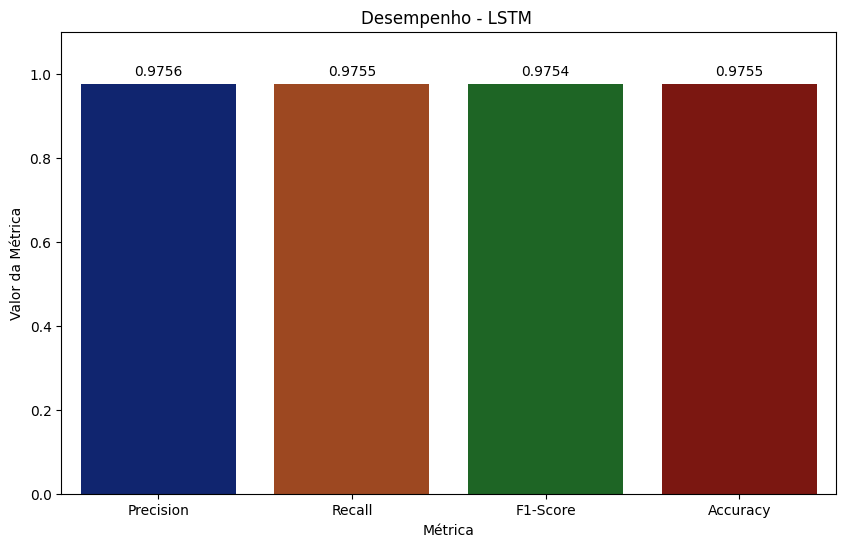

In [ ]:
precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_labels, y_pred_labels)

lstm_scores_temp = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
for nome_metrica in metricas_scoring.keys():
    scores_lstm = np.array(lstm_scores_temp[nome_metrica])

    all_scores_cv[nome_metrica]['LSTM'] = scores_lstm

print(f"Scores de CV do {'LSTM'} coletados e salvos em 'all_scores_cv_teste'.")

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}
df_metricas = pd.DataFrame(metricas)
df_metrics_lstm = df_metricas.copy()
df_metrics_lstm = df_metrics_lstm.insert(loc=0, column='Modelo', value='LSTM')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

plt.title('Desempenho - LSTM ')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.show()

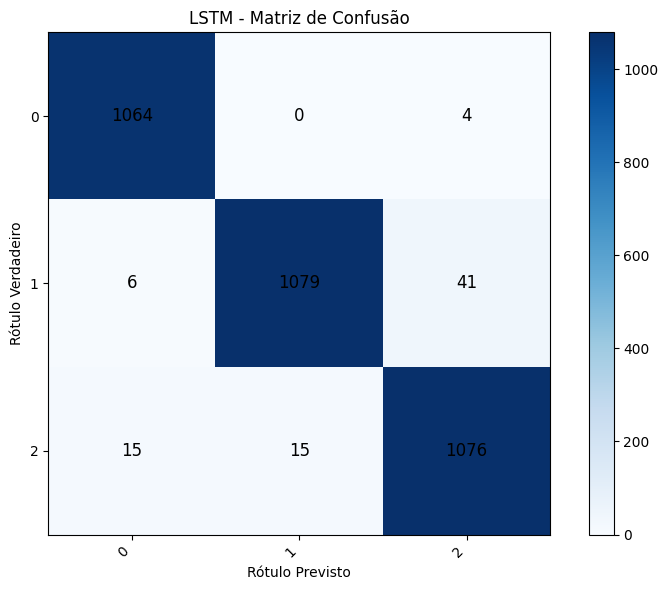

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.squeeze(y_test_lstm)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha='center', va='center',
                 color='black', fontsize=12) 

plt.title('LSTM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(classes)), labels=classes)

plt.tight_layout() 
plt.show()

104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


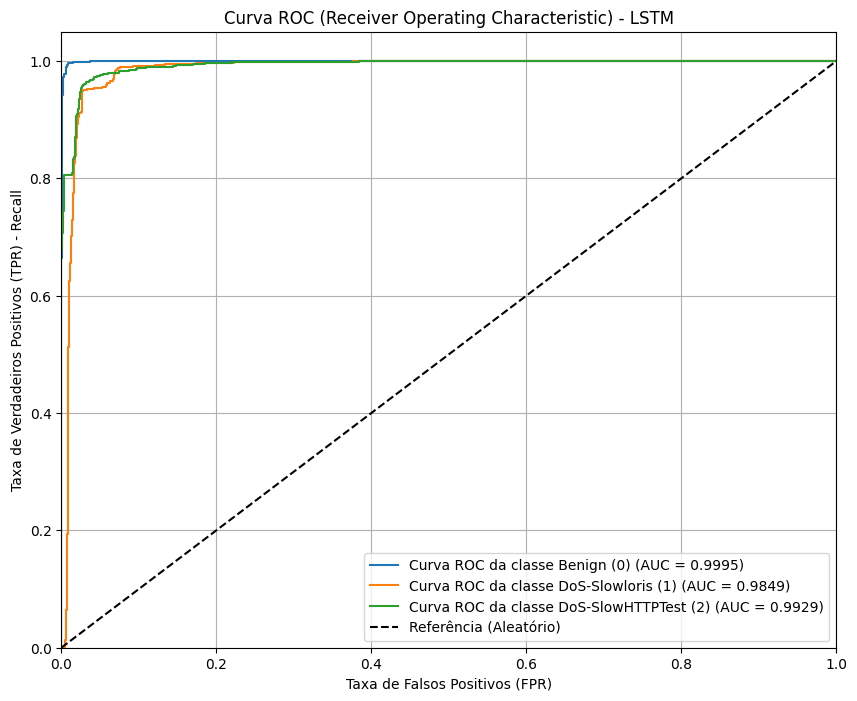

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


class_names = [0, 1, 2]
n_classes = len(class_names)

legend_names = ['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)']

y_pred_prob = model.predict(x_test_lstm) 

y_true_labels = np.squeeze(y_test_lstm)
y_test_bin = label_binarize(y_true_labels, classes=class_names)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {legend_names[i]} (AUC = {roc_auc[i]:.4f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) - Recall')
plt.title('Curva ROC (Receiver Operating Characteristic) - LSTM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
modelMLP = MLPClassifier(hidden_layer_sizes=(256,),
                        max_iter = 1000,activation = 'tanh',
                        solver = 'adam',
                        learning_rate_init = 0.05, early_stopping = True,
                        verbose=True)


In [86]:
modelMLP.fit(x_train, y_train)

Iteration 1, loss = 0.18097060
Validation score: 0.975000
Iteration 2, loss = 0.08084228
Validation score: 0.991667
Iteration 3, loss = 0.03327049
Validation score: 0.990152
Iteration 4, loss = 0.03298619
Validation score: 0.990152
Iteration 5, loss = 0.03410480
Validation score: 0.987879
Iteration 6, loss = 0.04021259
Validation score: 0.990909
Iteration 7, loss = 0.03474926
Validation score: 0.993939
Iteration 8, loss = 0.02973525
Validation score: 0.992424
Iteration 9, loss = 0.04584388
Validation score: 0.971212
Iteration 10, loss = 0.03508095
Validation score: 0.991667
Iteration 11, loss = 0.04960446
Validation score: 0.978030
Iteration 12, loss = 0.05976015
Validation score: 0.990152
Iteration 13, loss = 0.05849537
Validation score: 0.990152
Iteration 14, loss = 0.03891075
Validation score: 0.968939
Iteration 15, loss = 0.04139421
Validation score: 0.994697
Iteration 16, loss = 0.05213630
Validation score: 0.937879
Iteration 17, loss = 0.05694374
Validation score: 0.988636
Iterat

,hidden_layer_sizes,"(256,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.05
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


In [87]:
previsoes_algoritmos = {}

In [88]:
previsoes_algoritmos['LSTM'] = y_pred_labels

In [89]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [90]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:

nome_modelo = "MLP"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelMLP, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=1, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Scores de CV do MLP coletados e salvos em 'all_scores_cv_teste'.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished


In [ ]:
predictsMLP = modelMLP.predict(x_test)

accuracyMLP = accuracy_score(y_test, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y_test, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9924242424242424

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9916    0.9991    0.9953      1068
           1     0.9911    0.9902    0.9907      1126
           2     0.9945    0.9882    0.9914      1106

    accuracy                         0.9924      3300
   macro avg     0.9924    0.9925    0.9925      3300
weighted avg     0.9924    0.9924    0.9924      3300



In [93]:
print(f'Scores validação cruzada MLP: {scores}')
print(f'Média dos scores: {scores.mean()}')
print(f'Desvio padrão dos scores: {scores.std()}')

Scores validação cruzada MLP: [0.99636419 0.99212066 0.9909041  0.99332722 0.99332932 0.9878838
 0.99515369 0.99332481 0.99393012 0.99211742]
Média dos scores: 0.9928455313242539
Desvio padrão dos scores: 0.0022141405326452663


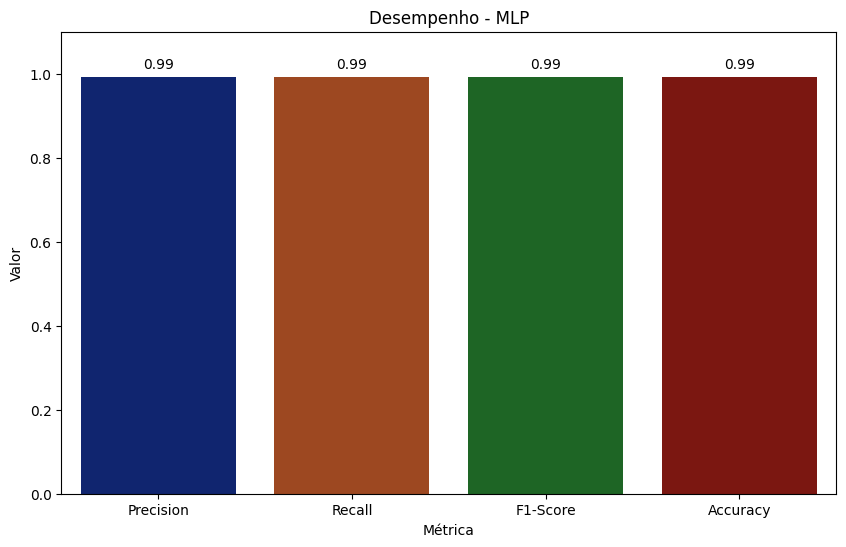

In [ ]:
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_mlp = df_metricas.copy()
df_metrics_mlp.insert(loc=0, column='Modelo', value='MLP')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

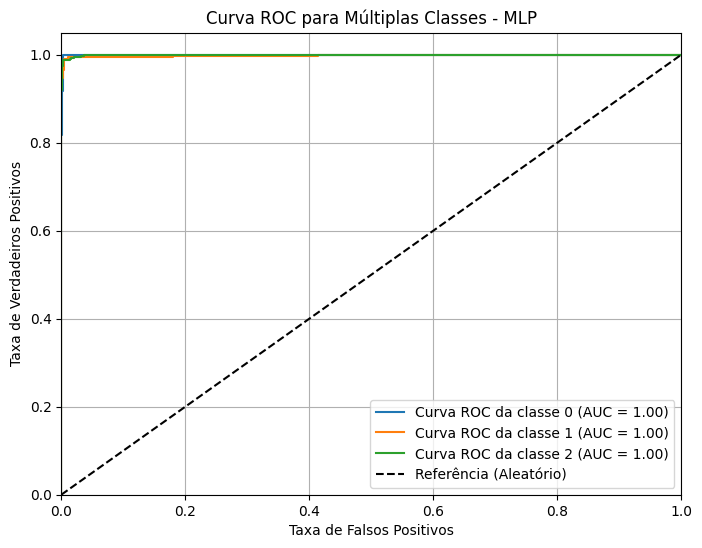

In [ ]:
class_names = modelMLP.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [97]:
previsoes_algoritmos['MLP'] = y_pred

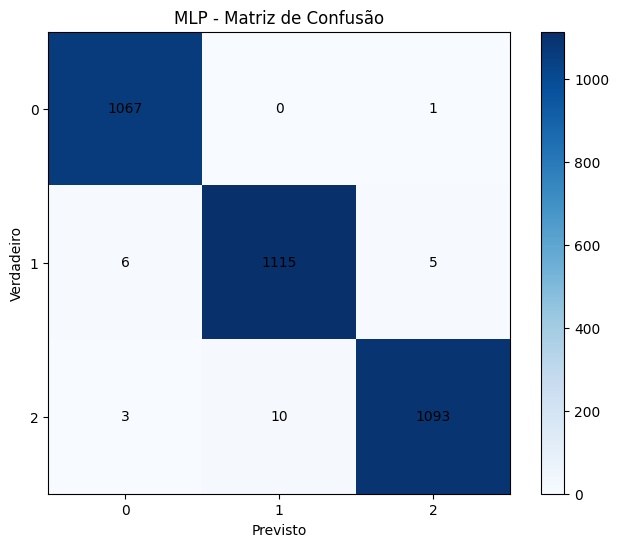

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

nome_modelo = "Naive Bayes"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(nb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

scores_nb = scores



Scores de CV do Naive Bayes coletados e salvos em 'all_scores_cv_teste'.


In [101]:
print(f'Scores validação cruzada MLP: {scores_nb}')
print(f'Média dos scores: {scores_nb.mean()}')
print(f'Desvio padrão dos scores: {scores_nb.std()}')

Scores validação cruzada MLP: [0.91073633 0.91879263 0.906361   0.90870735 0.91795669 0.89272668
 0.89943183 0.89468232 0.88960308 0.90346256]
Média dos scores: 0.9042460445749109
Desvio padrão dos scores: 0.009635623559628536


In [ ]:
predictsNB = nb.predict(x_test)

accuracyNB = accuracy_score(y_test, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y_test, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.9057575757575758

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9434    0.9981    0.9700      1068
           1     0.8255    0.9831    0.8974      1126
           2     0.9843    0.7378    0.8434      1106

    accuracy                         0.9058      3300
   macro avg     0.9177    0.9063    0.9036      3300
weighted avg     0.9169    0.9058    0.9028      3300



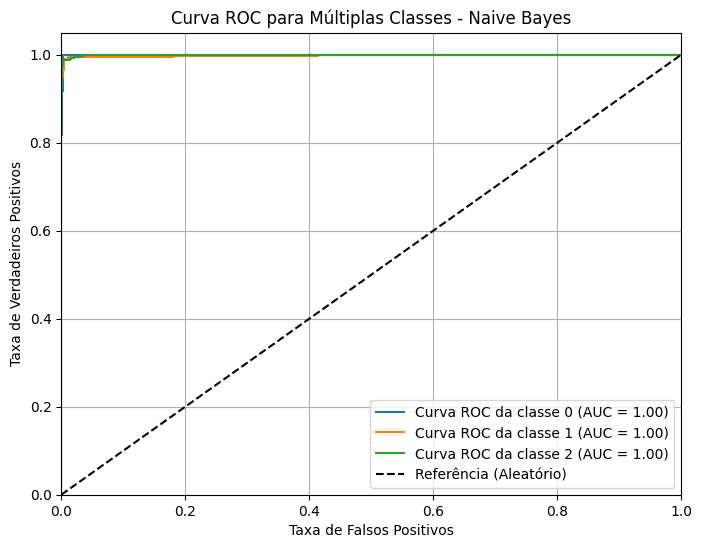

In [ ]:
class_names = nb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

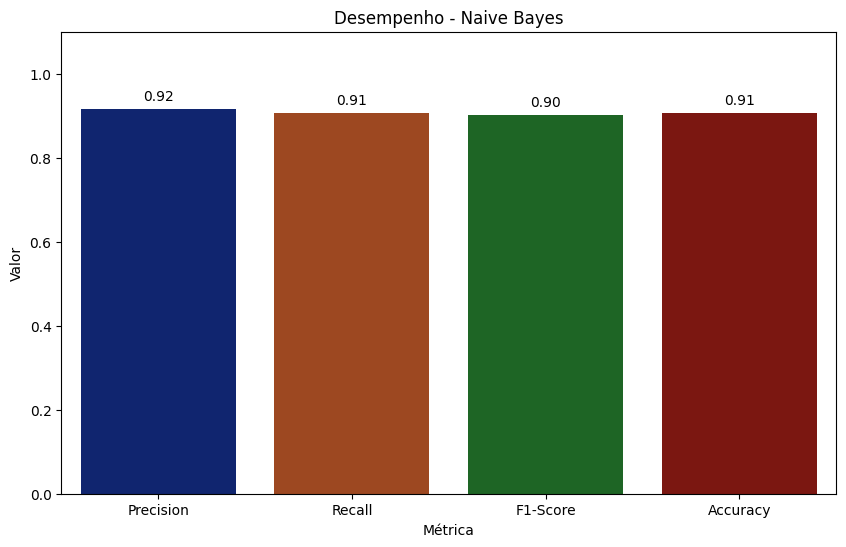

In [ ]:
y_pred = predictsNB
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_nb = df_metricas.copy()
df_metrics_nb.insert(loc=0, column='Modelo', value='Naive Bayes')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

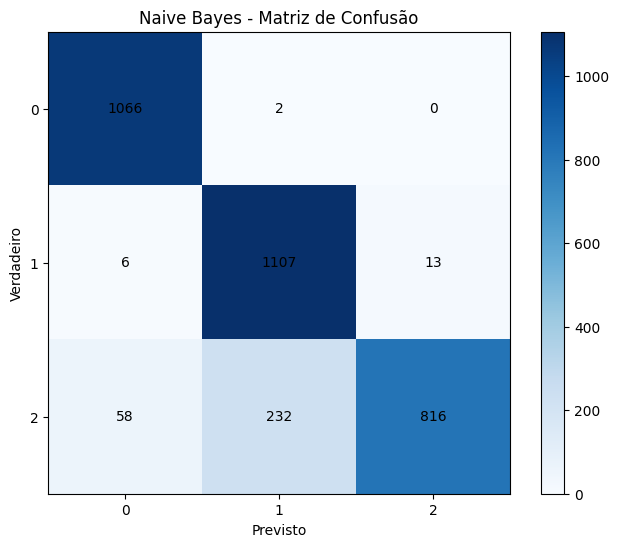

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Naive Bayes - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [106]:
previsoes_algoritmos['Naive Bayes'] = y_pred

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(
  criterion='entropy',
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=None
)

modelDT.fit(x_train, y_train)

nome_modelo = "Decision Tree"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelDT, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

scores_DT = scores
print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

print(f'Scores validação cruzada MLP: {scores_DT}')
print(f'Média dos scores: {scores_DT.mean()}')
print(f'Desvio padrão dos scores: {scores_DT.std()}')


Scores de CV do Decision Tree coletados e salvos em 'all_scores_cv_teste'.
Scores validação cruzada MLP: [0.99878788 0.99939394 0.99818237 1.         0.99818181 0.99818291
 0.9981818  0.99939357 0.99818071 0.9981796 ]
Média dos scores: 0.9986664602656733
Desvio padrão dos scores: 0.0006528326345816027


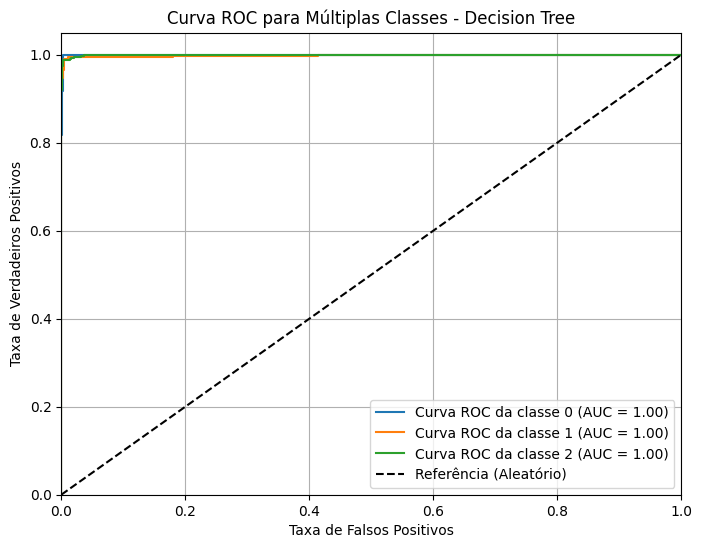

In [ ]:
class_names = modelDT.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsDT = modelDT.predict(x_test)

accuracyDT = accuracy_score(y_test, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y_test, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9981818181818182

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9981    0.9981    0.9981      1068
           1     0.9991    0.9973    0.9982      1126
           2     0.9973    0.9991    0.9982      1106

    accuracy                         0.9982      3300
   macro avg     0.9982    0.9982    0.9982      3300
weighted avg     0.9982    0.9982    0.9982      3300



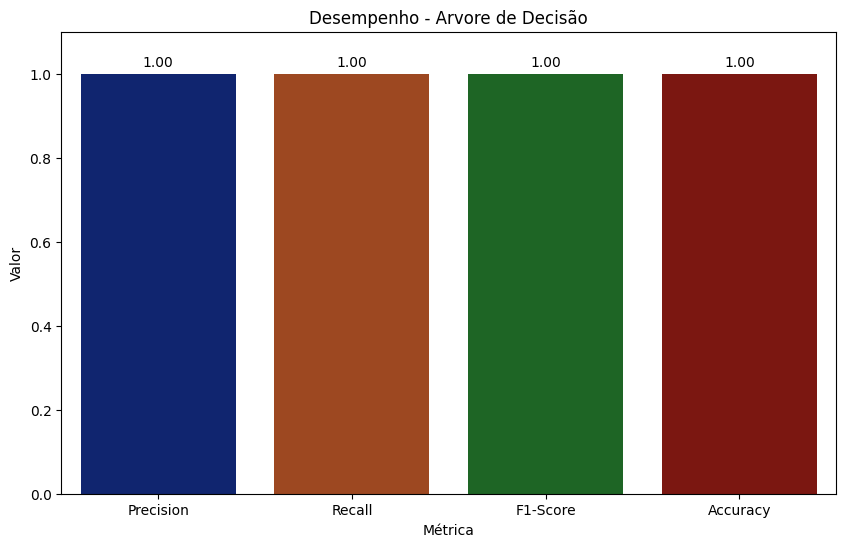

In [ ]:
y_pred = predictsDT
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_dt = df_metricas.copy()
df_metrics_dt.insert(loc=0, column='Modelo', value='Arvore de Decisão')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [111]:
previsoes_algoritmos['Arvore de Decisão'] = y_pred

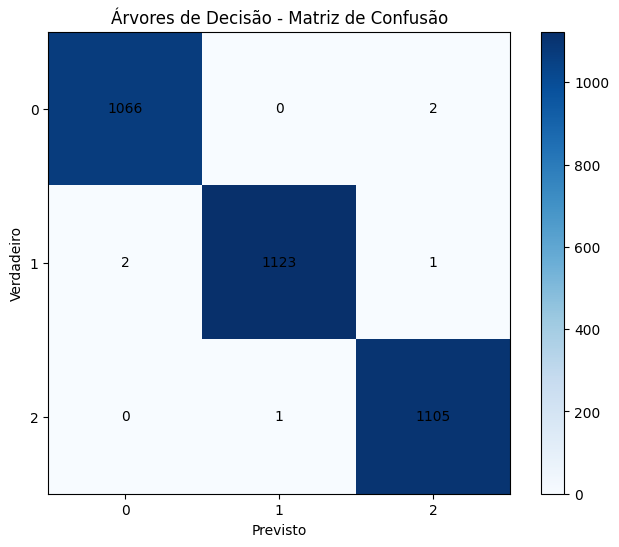

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
  n_estimators=100,
  criterion='entropy',
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42
)

modelRF.fit(x_train, y_train)

nome_modelo = "Random Forest"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(modelRF, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_RF = scores
print(f'Scores validação cruzada MLP: {scores_RF}')
print(f'Média dos scores: {scores_RF.mean()}')
print(f'Desvio padrão dos scores: {scores_RF.std()}')



Scores validação cruzada MLP: [0.99939394 1.         1.         1.         1.         1.
 0.99939394 1.         0.99939357 1.        ]
Média dos scores: 0.9998181449146678
Desvio padrão dos scores: 0.0002777882475580498


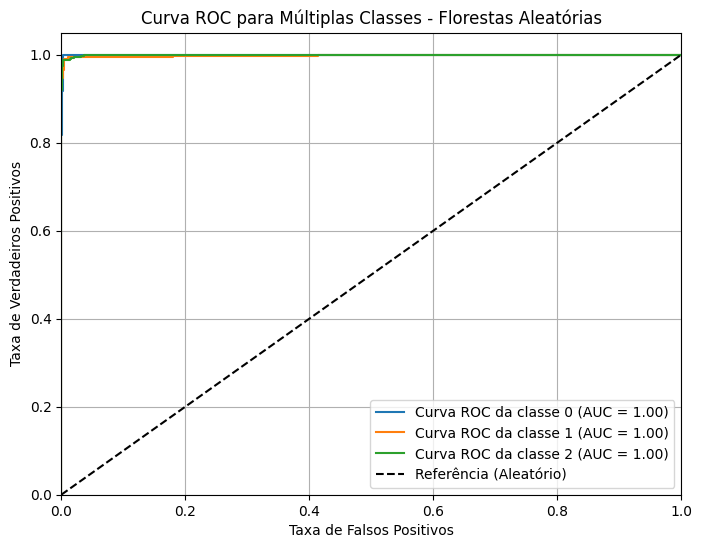

In [ ]:
class_names = modelRF.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y_test, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9993939393939394

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9981    1.0000    0.9991      1068
           1     1.0000    0.9982    0.9991      1126
           2     1.0000    1.0000    1.0000      1106

    accuracy                         0.9994      3300
   macro avg     0.9994    0.9994    0.9994      3300
weighted avg     0.9994    0.9994    0.9994      3300



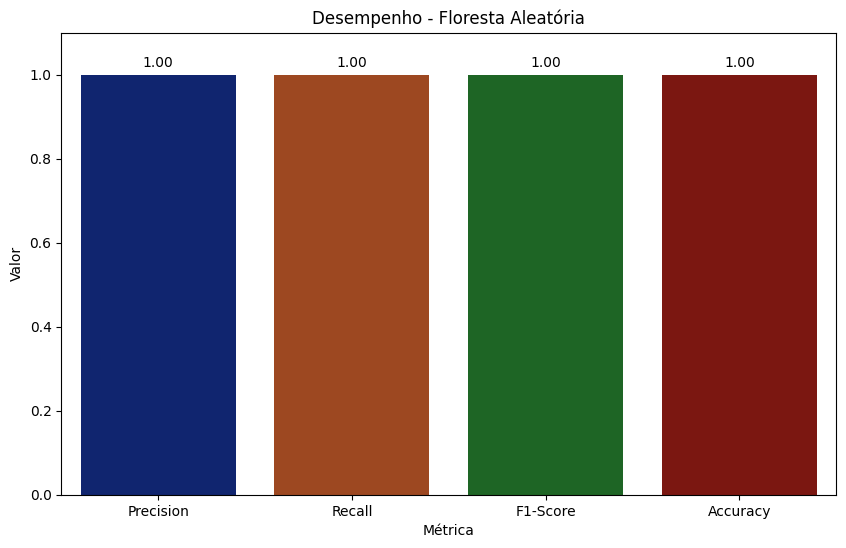

In [ ]:
y_pred = predictsRF
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_rf = df_metricas.copy()
df_metrics_rf.insert(loc=0, column='Modelo', value='Floresta Aleatória')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Floresta Aleatória')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [118]:
previsoes_algoritmos['Floresta Aleatória'] = y_pred

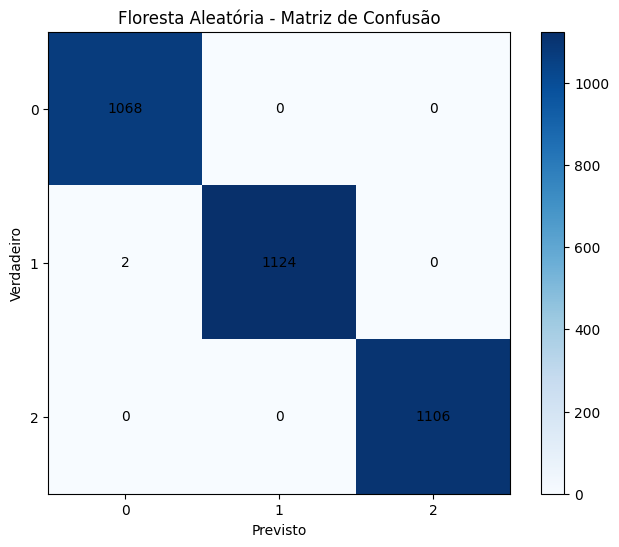

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Floresta Aleatória - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42, verbose=True)

svm.fit(x_train, y_train)


nome_modelo = "SVM"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(svm, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)
    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_SVM = scores



[LibSVM]

In [121]:
print(f'Scores validação cruzada SVM: {scores_SVM}')
print(f'Média dos scores: {scores_SVM.mean()}')
print(f'Desvio padrão dos scores: {scores_SVM.std()}')

Scores validação cruzada SVM: [0.98424833 0.98177405 0.98300336 0.97999271 0.98665277 0.98361787
 0.97690378 0.97694222 0.96963465 0.97874124]
Média dos scores: 0.9801510975766534
Desvio padrão dos scores: 0.004640015135992683


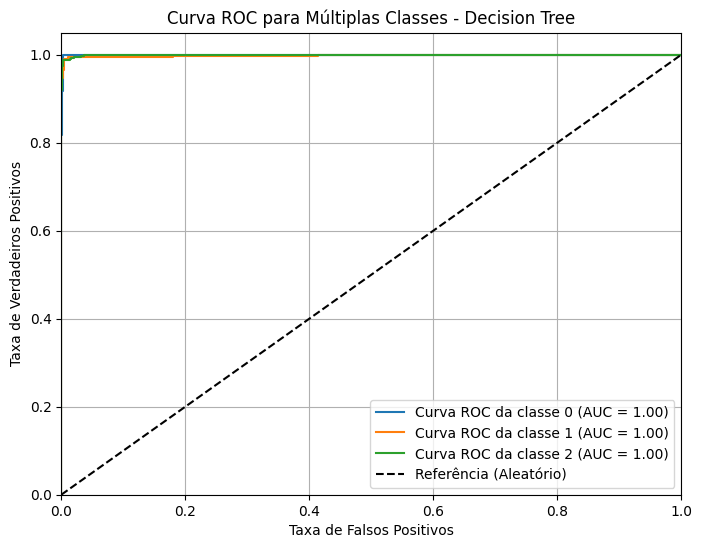

In [ ]:
class_names = svm.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsSVM = svm.predict(x_test)

accuracySVM = accuracy_score(y_test, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y_test, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.9684848484848485

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9926    0.9991    0.9958      1068
           1     0.9414    0.9707    0.9558      1126
           2     0.9737    0.9367    0.9548      1106

    accuracy                         0.9685      3300
   macro avg     0.9692    0.9688    0.9688      3300
weighted avg     0.9688    0.9685    0.9684      3300



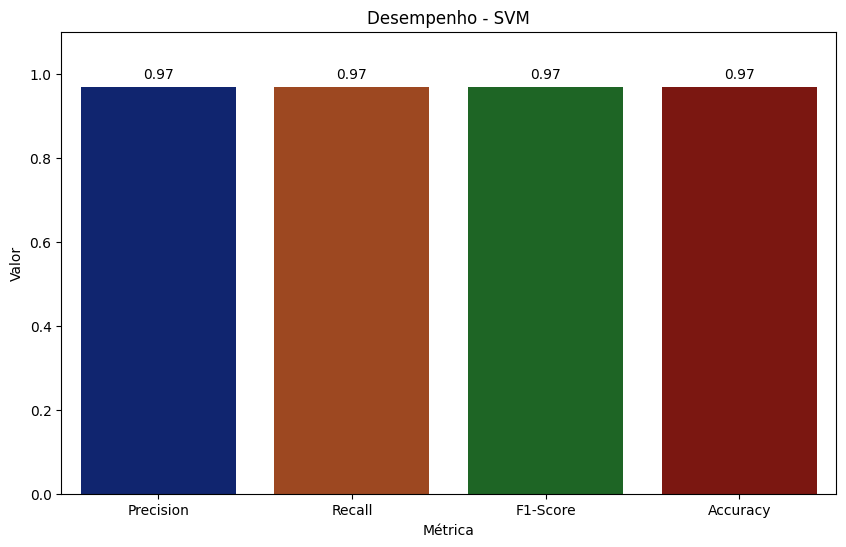

In [ ]:
y_pred = predictsSVM
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_svm = df_metricas.copy()
df_metrics_svm.insert(loc=0, column='Modelo', value='SVM')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [125]:
previsoes_algoritmos['SVM'] = y_pred

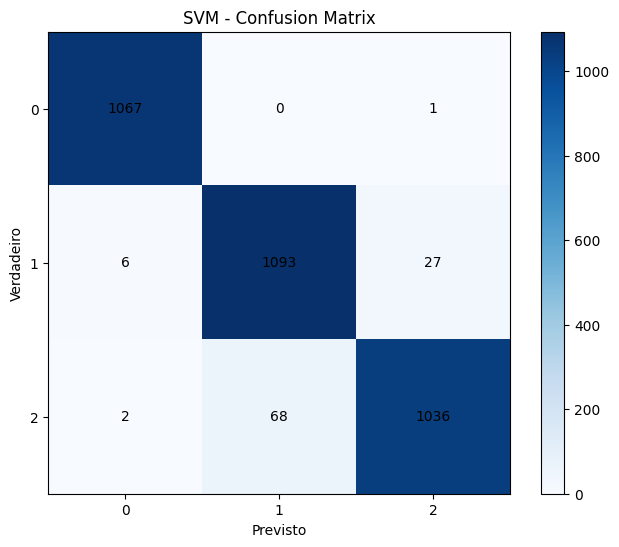

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adb.fit(x_train, y_train)


nome_modelo = "AdaBoost"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(adb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_adb = scores


print(f'Scores validação cruzada adaBoost: {scores_adb}')
print(f'Média dos scores: {scores_adb.mean()}')
print(f'Desvio padrão dos scores: {scores_adb.std()}')

Scores validação cruzada adaBoost: [0.98423455 0.95502735 0.98846685 0.982419   0.98242861 0.97575428
 0.9751647  0.98907197 0.97149621 0.99271101]
Média dos scores: 0.9796774520127446
Desvio padrão dos scores: 0.010399772618850129


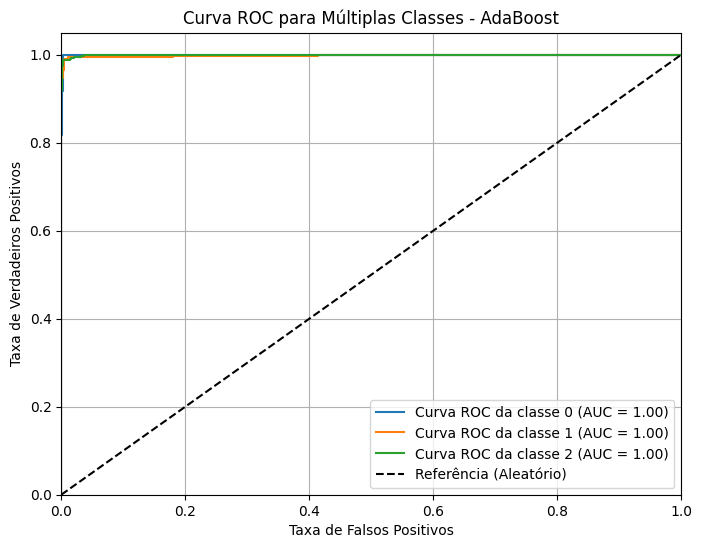

In [ ]:
class_names = adb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictions_adb = adb.predict(x_test)
print(classification_report(y_test, predictions_adb))
accuracyadb = accuracy_score(y_test, predictions_adb)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')
reportadb = classification_report(y_test, predictions_adb, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       0.91      0.99      0.95      1126
           2       1.00      0.91      0.95      1106

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300

Precisão do modelo de AdaBoost: 0.9663636363636363

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9953    0.9991    0.9972      1068
           1     0.9143    0.9947    0.9528      1126
           2     0.9990    0.9060    0.9502      1106

    accuracy                         0.9664      3300
   macro avg     0.9695    0.9666    0.9667      3300
weighted avg     0.9689    0.9664    0.9663      3300



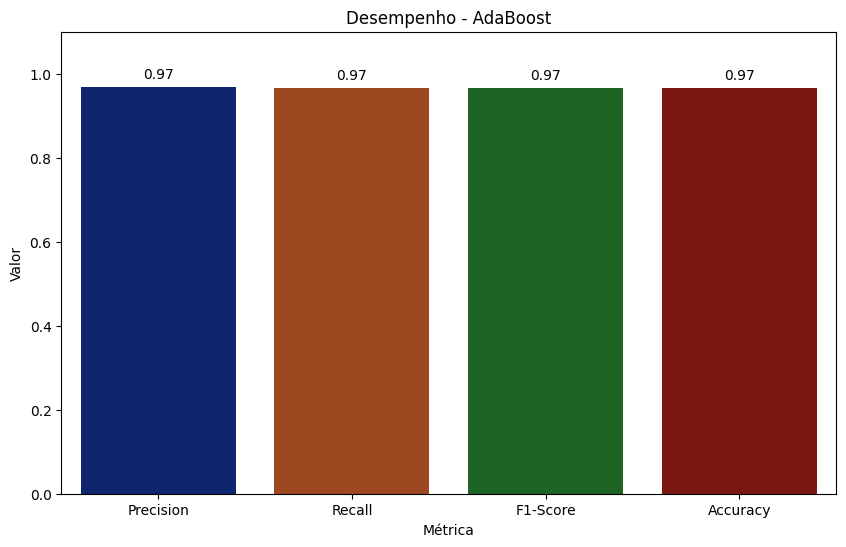

In [ ]:
y_pred = predictions_adb
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_adb = df_metricas.copy()
df_metrics_adb.insert(loc=0, column='Modelo', value='AdaBoost')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  
                textcoords = 'offset points')

plt.title('Desempenho - AdaBoost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [131]:
previsoes_algoritmos['AdaBoost'] = y_pred

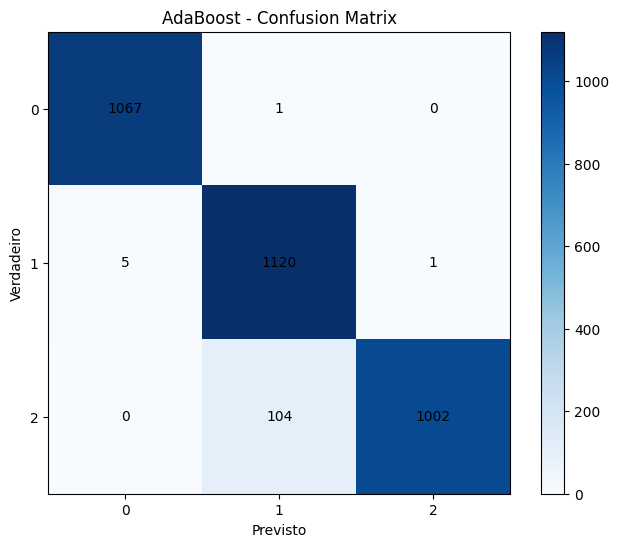

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [134]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back), 0]
       X.append(a)
       y.append(data[i + look_back, 0])
   return np.array(X), np.array(y)


look_back = 10
X, y = create_dataset(x, look_back)

In [135]:
X_gru = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
scaler_ts = StandardScaler()
scaler_ts.fit(x[:, 0].reshape(-1, 1))

,copy,True
,with_mean,True
,with_std,True


In [ ]:
model_gru_ts = Sequential()
model_gru_ts.add(GRU( 50 , return_sequences= True , input_shape=(look_back, 1 )))
model_gru_ts.add(GRU( 50 ))
model_gru_ts.add(Dense( 1 ))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [138]:
model_gru_ts.compile(optimizer='adam', loss='mean_squared_error')

In [139]:
model_gru_ts.fit(X_gru, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.2423
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.1987
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.2061
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - loss: 0.2002
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.1943
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.1980
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.1920
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.1952
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - loss: 0.1913
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - loss: 0.1997
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.1963
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.1902
Epoch 13/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - loss: 0.1842
Epoch 14/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 37s 71ms/step - loss: 0.1886
Epoch 15/100
51

In [ ]:
predictions = model_gru_ts.predict(X)

predictions = scaler_ts.inverse_transform(predictions)
y_actual = scaler_ts.inverse_transform([y])

516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

def make_gru_model(input_shape, num_classes, dropout_rate=0.5):

    model = Sequential()
    model.add(GRU(units=128,
                  input_shape=input_shape,
                  return_sequences=False,
                  implementation=2)) 

    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    return model


print("\n\n---------------------------------------------")
print("INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU")
print("---------------------------------------------")

model_gru_name = "GRU"
n_folds = 10

gru_scores_temp = {nome_metrica: [] for nome_metrica in metricas_scoring.keys()}
input_shape = x_train_lstm.shape[1:]

for fold_no, (train_index, val_index) in enumerate(tqdm(kf.split(x_train_lstm, y_train_lstm), total=n_folds, desc=f"Folds do {model_gru_name}")):

    X_train_fold, X_val_fold = x_train_lstm[train_index], x_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    model_gru = make_gru_model(input_shape, num_classes)

    model_gru.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy'],
    )

    model_gru.fit(X_train_fold, Y_train_fold, epochs=35, batch_size=32, verbose=1)

    y_pred_probs = model_gru.predict(X_val_fold, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1) 
    y_true_labels = np.squeeze(Y_val_fold) 

    gru_scores_temp['Accuracy'].append(accuracy_score(y_true_labels, y_pred_labels))
    gru_scores_temp['Precision'].append(precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['Recall'].append(recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['F1-Score'].append(f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))

for nome_metrica in metricas_scoring.keys():
    all_scores_cv[nome_metrica][model_gru_name] = np.array(gru_scores_temp[nome_metrica])

print("\nValidação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.")

modelGRU_final = make_gru_model(input_shape, num_classes)
modelGRU_final.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

print("\nTreinando modelo GRU final...")
modelGRU_final.fit(x_train_lstm, y_train_lstm, epochs=50, batch_size=32, callbacks=callbacks, validation_split=0.2, verbose=0)

test_loss_gru, test_acc_gru = modelGRU_final.evaluate(x_test_lstm, y_test_lstm, verbose=0)
print(f"Acurácia final do GRU no teste: {test_acc_gru:.4f}")

modelGRU_final.save('best_model_gru.keras')
modelGRU = modelGRU_final 

y_pred_probs_gru = modelGRU.predict(x_test_lstm)
y_pred_gru = np.argmax(y_pred_probs_gru, axis=1)
previsoes_algoritmos['GRU'] = y_pred_gru

print("Modelo GRU final treinado e salvo como 'modelGRU'.")



---------------------------------------------
INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU
---------------------------------------------


Folds do GRU:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.7524 - loss: 0.5917
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9169 - loss: 0.2149
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.8578 - loss: 0.3806
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9403 - loss: 0.1748
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9485 - loss: 0.1413
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9451 - loss: 0.1586
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9224 - loss: 0.2091
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9601 - loss: 0.1105
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9654 - loss: 0.1044
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 77ms/step - accuracy: 0.9652 - loss: 0.0919
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9574 - loss: 0.1142
Epoch 12/35
372/372 ━━━━━━━━━━

Folds do GRU:  10%|█         | 1/10 [16:20<2:27:04, 980.45s/it]

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.7501 - loss: 0.5763
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9193 - loss: 0.2180
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9130 - loss: 0.2240
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9225 - loss: 0.1988
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9167 - loss: 0.1908
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9423 - loss: 0.1537
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9198 - loss: 0.2099
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9562 - loss: 0.1274
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9481 - loss: 0.1540
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9627 - loss: 0.1238
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9702 - loss: 0.0904
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  20%|██        | 2/10 [32:39<2:10:36, 979.54s/it]

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.7494 - loss: 0.5850
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9297 - loss: 0.1871
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9087 - loss: 0.2277
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9399 - loss: 0.1621
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.8398 - loss: 0.4183
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.8859 - loss: 0.2839
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9479 - loss: 0.1581
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9517 - loss: 0.1278
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9518 - loss: 0.1366
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9161 - loss: 0.2230
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9619 - loss: 0.1061
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  30%|███       | 3/10 [48:55<1:54:04, 977.79s/it]

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.7296 - loss: 0.6298
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9117 - loss: 0.2297
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9295 - loss: 0.1816
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9385 - loss: 0.1552
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9348 - loss: 0.1647
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9150 - loss: 0.2173
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9435 - loss: 0.1390
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9555 - loss: 0.1175
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9669 - loss: 0.0987
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9598 - loss: 0.1185
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9461 - loss: 0.1335
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  40%|████      | 4/10 [1:05:23<1:38:11, 981.98s/it]

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.7423 - loss: 0.6205
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9160 - loss: 0.2246
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9282 - loss: 0.1858
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9502 - loss: 0.1507
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9514 - loss: 0.1446
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9526 - loss: 0.1285
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9140 - loss: 0.2154
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9600 - loss: 0.1162
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9600 - loss: 0.1010
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9543 - loss: 0.1194
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9700 - loss: 0.0873
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  50%|█████     | 5/10 [1:22:03<1:22:22, 988.59s/it]

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.7451 - loss: 0.5989
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9156 - loss: 0.2300
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9212 - loss: 0.2143
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9380 - loss: 0.1785
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9458 - loss: 0.1509
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.8978 - loss: 0.2594
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9314 - loss: 0.1832
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9334 - loss: 0.1659
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9589 - loss: 0.1175
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9613 - loss: 0.1108
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9630 - loss: 0.1027
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  60%|██████    | 6/10 [1:38:33<1:05:56, 989.05s/it]

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.7323 - loss: 0.6199
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9188 - loss: 0.2061
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9293 - loss: 0.1853
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9362 - loss: 0.1591
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9383 - loss: 0.1579
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.9414 - loss: 0.1404
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.9508 - loss: 0.1240
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9552 - loss: 0.1150
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.9589 - loss: 0.1026
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9566 - loss: 0.1142
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.9489 - loss: 0.1282
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  70%|███████   | 7/10 [1:55:18<49:42, 994.16s/it]  

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.7492 - loss: 0.5821
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9150 - loss: 0.2151
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9300 - loss: 0.1771
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9489 - loss: 0.1485
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9331 - loss: 0.1823
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9518 - loss: 0.1301
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9617 - loss: 0.1224
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9207 - loss: 0.2101
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9578 - loss: 0.1147
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9661 - loss: 0.1064
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9782 - loss: 0.0814
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  80%|████████  | 8/10 [2:11:38<32:59, 989.58s/it]

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.7255 - loss: 0.6135
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9178 - loss: 0.2145
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9304 - loss: 0.1769
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9336 - loss: 0.1742
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9412 - loss: 0.1414
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9555 - loss: 0.1129
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9556 - loss: 0.1090
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9533 - loss: 0.1207
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9611 - loss: 0.1020
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9566 - loss: 0.1143
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9631 - loss: 0.0933
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  90%|█████████ | 9/10 [2:27:57<16:26, 986.43s/it]

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.7402 - loss: 0.6037
Epoch 2/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9192 - loss: 0.2078
Epoch 3/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9398 - loss: 0.1720
Epoch 4/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9466 - loss: 0.1547
Epoch 5/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9473 - loss: 0.1537
Epoch 6/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9573 - loss: 0.1194
Epoch 7/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.9580 - loss: 0.1180
Epoch 8/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9605 - loss: 0.1188
Epoch 9/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9486 - loss: 0.1494
Epoch 10/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9661 - loss: 0.1015
Epoch 11/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9690 - loss: 0.0844
Epoch 12/35
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU: 100%|██████████| 10/10 [2:44:14<00:00, 985.41s/it]
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Validação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.

Treinando modelo GRU final...
Restoring model weights from the end of the best epoch: 46.
Acurácia final do GRU no teste: 0.9894
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Modelo GRU final treinado e salvo como 'modelGRU'.


In [ ]:
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_gru.keras')

In [144]:
dt_test = pd.DataFrame(all_scores_cv)
dt_test.tail()

,Accuracy,Precision,Recall,F1-Score
Decision Tree,"[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9981851179673322, 0.9993950393224441, 0.998...","[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9987878782870019, 0.9993939388930625, 0.998..."
Random Forest,"[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939388930625, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
SVM,"[0.9842424242424243, 0.9818181818181818, 0.983...","[0.9847999167424538, 0.9821924983378567, 0.983...","[0.9842424242424243, 0.9818181818181818, 0.983...","[0.9842483320298903, 0.9817740483960844, 0.983..."
AdaBoost,"[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842407140415363, 0.9574495746591163, 0.988...","[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842345497356941, 0.9550273456375433, 0.988..."
GRU,"[0.9825757575757575, 0.9939393939393939, 0.994...","[0.9826945967412498, 0.99397088669606, 0.99470...","[0.9825757575757575, 0.9939393939393939, 0.994...","[0.9825712333318805, 0.9939441553813464, 0.994..."


In [145]:
previsoes_df = pd.DataFrame(previsoes_algoritmos)
previsoes_df.tail()

,LSTM,MLP,Naive Bayes,Arvore de Decisão,Floresta Aleatória,SVM,AdaBoost,GRU
3295,0,0,0,0,0,0,0,0
3296,0,0,0,0,0,0,0,0
3297,0,0,0,0,0,0,0,0
3298,1,1,1,1,1,1,1,1
3299,2,2,2,2,2,2,2,2


In [146]:
all_metrics_algorithm = pd.concat([df_metrics_lstm,df_metrics_mlp,df_metrics_dt, df_metrics_rf, df_metrics_svm, df_metrics_adb])
all_metrics_algorithm.head()

,Modelo,Métrica,Valor
0,MLP,Precision,0.992430
1,MLP,Recall,0.992424
2,MLP,F1-Score,0.992419
3,MLP,Accuracy,0.992424
0,Arvore de Decisão,Precision,0.998183


In [147]:
data_metrics = all_metrics_algorithm.reset_index(drop=True)

In [ ]:
data_metrics.to_csv('/poseiddon/GROUP A/CONFIGURATION 5/metricas_algoritmos.csv')
previsoes_df.to_csv('/poseiddon/GROUP A/CONFIGURATION 5/previsoes_algoritmos.csv')

In [ ]:
teste = pd.read_csv('/poseiddon/GROUP A/CONFIGURATION 5/metricas_algoritmos.csv', index_col=0)
teste.head()

,Modelo,Métrica,Valor
0,MLP,Precision,0.992430
1,MLP,Recall,0.992424
2,MLP,F1-Score,0.992419
3,MLP,Accuracy,0.992424
4,Arvore de Decisão,Precision,0.998183


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

modelos = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

scores_f1_por_algoritmo = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

In [153]:
data_score = pd.DataFrame(all_scores_cv)
data_score.head()

,Accuracy,Precision,Recall,F1-Score
LSTM,0.9754545454545455,0.975603762529719,0.9754545454545455,0.9754255862397115
MLP,"[0.9921212121212121, 0.9939393939393939, 0.990...","[0.9957597716075596, 0.9915172832738686, 0.990...","[0.9945454545454545, 0.9927272727272727, 0.993...","[0.9963641853247713, 0.9921206561478, 0.990904..."
Naive Bayes,"[0.9133333333333333, 0.9206060606060606, 0.909...","[0.9250988474496993, 0.9277623191235757, 0.919...","[0.9133333333333333, 0.9206060606060606, 0.909...","[0.910736325753235, 0.9187926252234531, 0.9063..."
Decision Tree,"[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9981851179673322, 0.9993950393224441, 0.998...","[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9987878782870019, 0.9993939388930625, 0.998..."
Random Forest,"[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939388930625, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


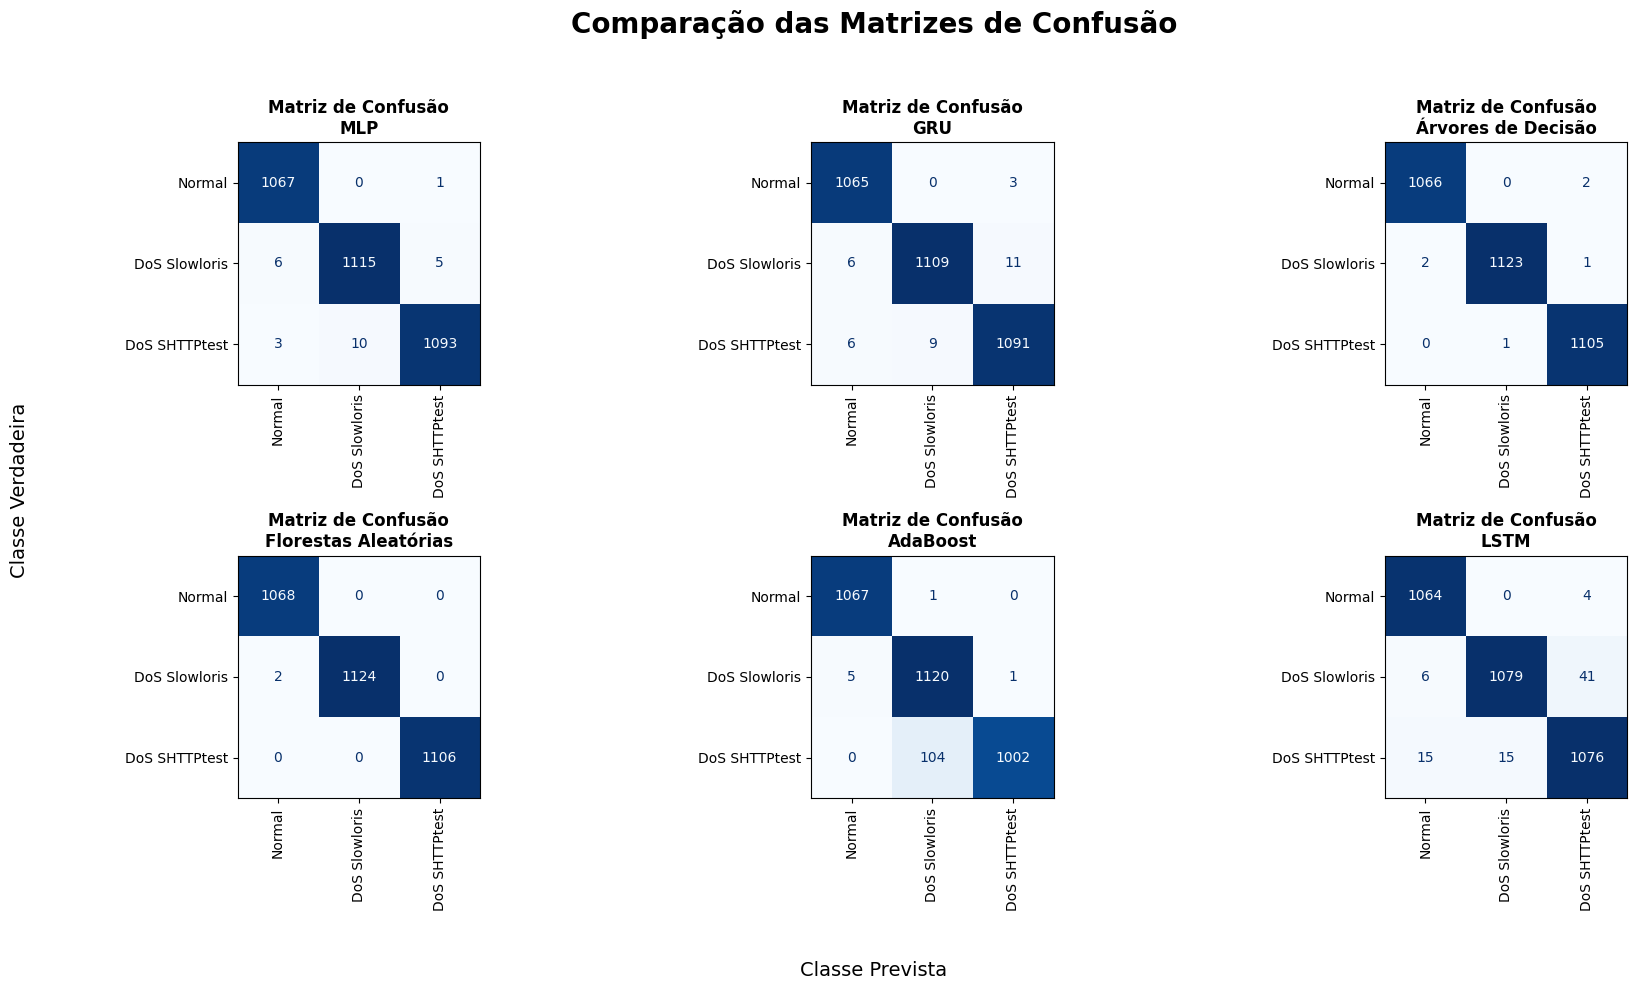

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "MLP": modelMLP,
    "GRU": modelGRU, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

nomes_classes = ['Normal', 'DoS Slowloris', 'DoS SHTTPtest']

x_test_sklearn = x_test 
x_test_lstm = x_test_lstm 

predicoes = {}

for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_probs = modelo.predict(x_test_lstm, verbose=0)
        predicoes[nome] = np.argmax(y_pred_probs, axis=1)

    else:
        predicoes[nome] = modelo.predict(x_test_sklearn)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

y_true_labels_1d = np.squeeze(y_test_lstm)


for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):

    if hasattr(modelo, 'classes_'):
        model_classes = modelo.classes_
    else: 
        model_classes = np.arange(len(nomes_classes))

    cm = confusion_matrix(y_true_labels_1d, predicoes[nome_modelo], labels=model_classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    ax.set_title(f"Matriz de Confusão\n{nome_modelo}", fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.supxlabel('Classe Prevista', fontsize=14)
fig.supylabel('Classe Verdadeira', fontsize=14)
fig.suptitle("Comparação das Matrizes de Confusão", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

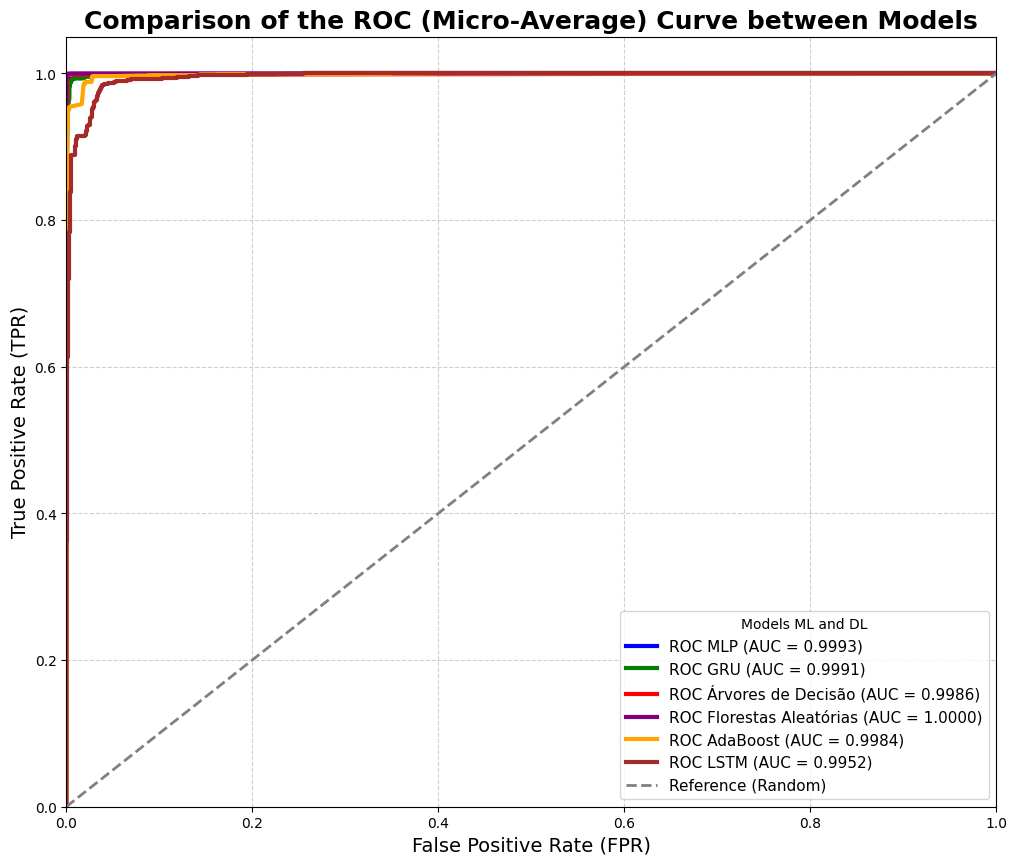

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import logging

logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

modelos = {
    "MLP": modelMLP,
    "GRU": model_gru, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

x_test_sklearn = x_test
x_test_lstm = x_test_lstm
y_test_reais = y_test

class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)

plt.figure(figsize=(12, 10))

cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        logging.warning(f"O modelo {nome_modelo} foi ignorado por não possuir método de probabilidades.")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)], 
        lw=3, 
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})' 
    )

plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')
plt.legend(loc="lower right", fontsize=11, title="Models ML and DL")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

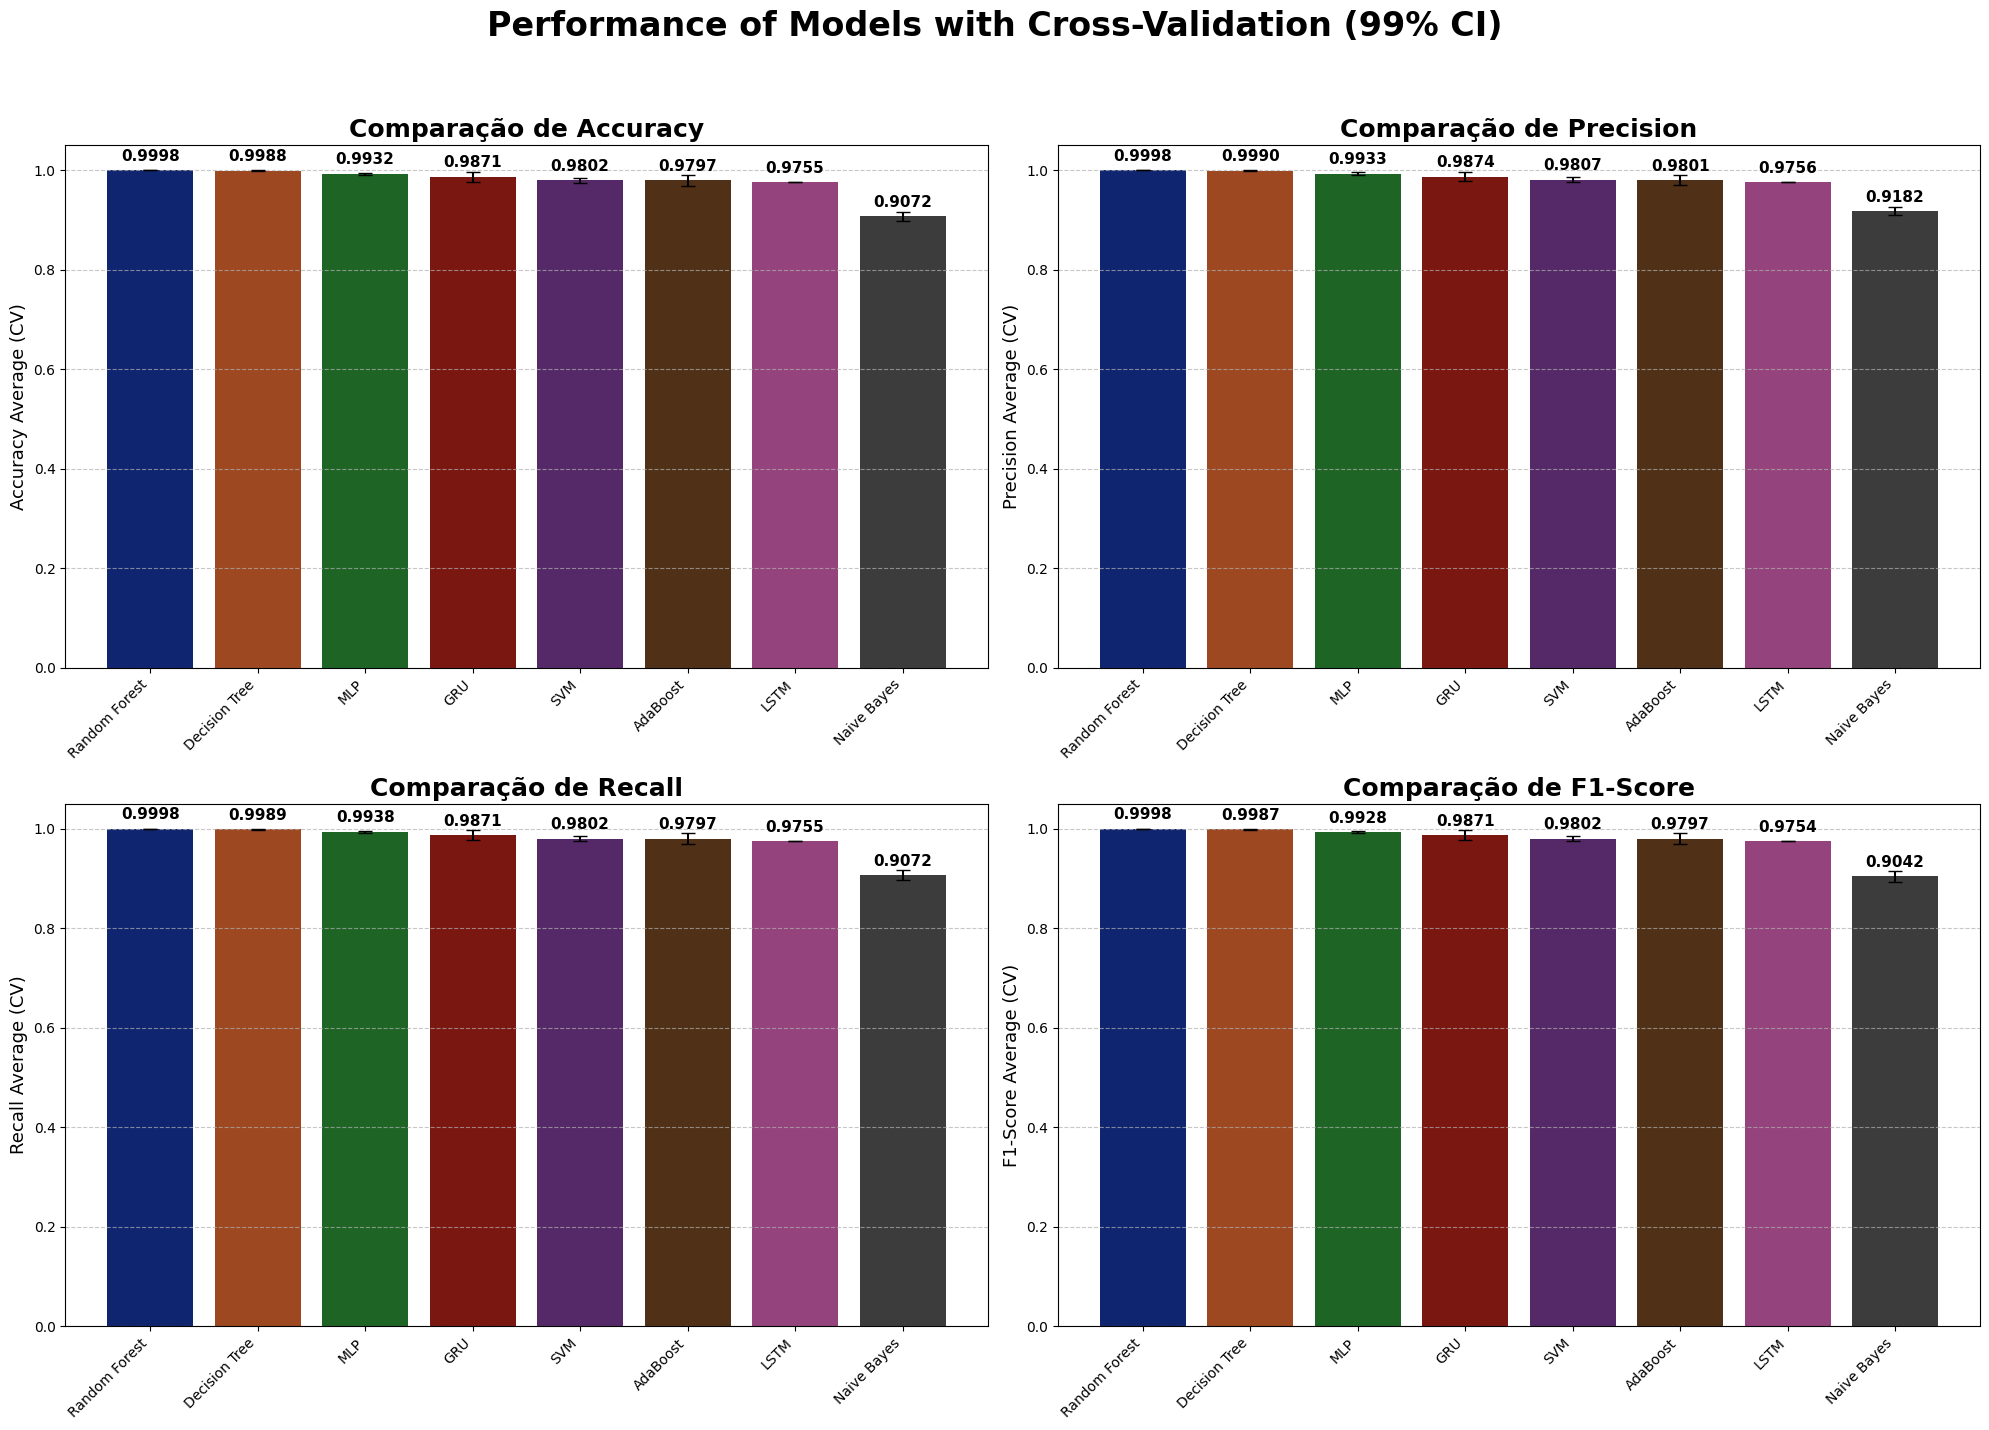

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem, t 

def calcular_ic_95(dados):
    dados = np.array(dados)
    if dados.size < 2:
        return 0

    return t.ppf(0.995, dados.size - 1) * sem(dados)

metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores_globais = all_scores_cv

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) 

    scores_da_metrica_atual = scores_globais[metrica]
    dados_plot = []

    for nome_modelo, scores in scores_da_metrica_atual.items():

        scores = np.array(scores)
        if scores.size == 0:
             continue

        media = np.mean(scores)
        ic = calcular_ic_95(scores) 

        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    if not dados_plot:
        plt.title(f"Dados indisponíveis para {metrica}", fontsize=16)
        continue

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5, lw=1.5)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', fontsize=11, fontweight='bold')

    plt.title(f"Comparação de {metrica}", fontsize=18, fontweight='bold')
    plt.ylim(0, 1.05) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average (CV)", fontsize=13)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

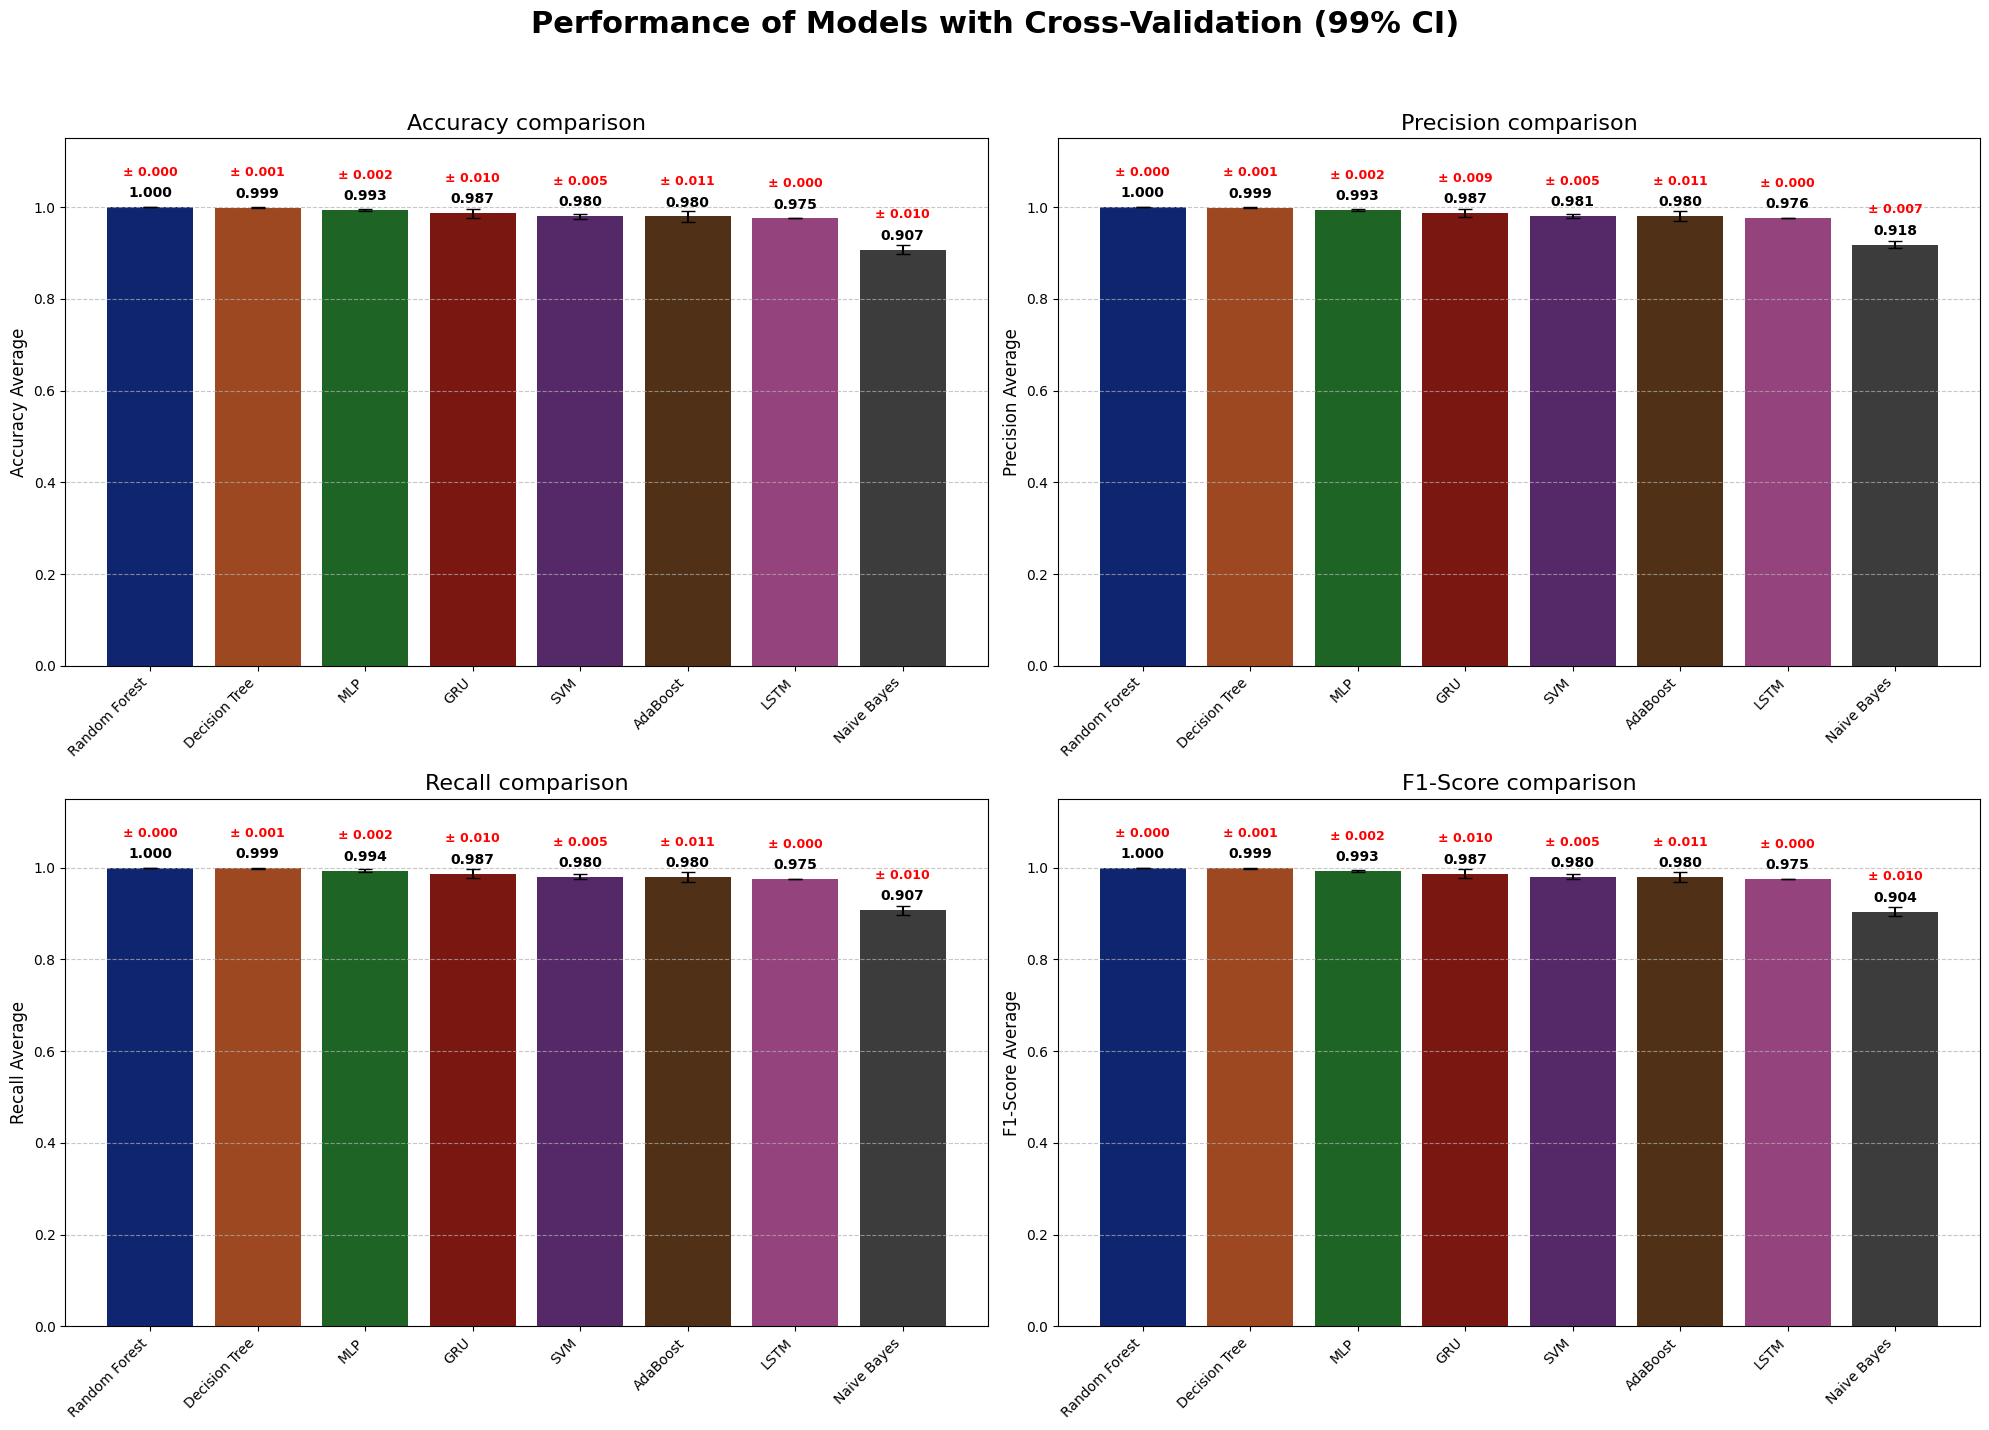

In [ ]:
metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) 

    scores_da_metrica_atual = all_scores_cv[metrica]

    dados_plot = []
    for nome_modelo, scores in scores_da_metrica_atual.items():
        media = np.mean(scores)
        ic = calcular_ic_95(scores)
        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5)

    for j, p in enumerate(ax.patches):
        media_valor = p.get_height()

        ic_valor = df_plot['IC'].iloc[j]

        ax.annotate(f'{media_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=10, fontweight='bold')

        ax.annotate(f'± {ic_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor), 
                    ha='center', va='center',
                    xytext=(0, 25), textcoords='offset points', 
                    fontsize=9, color='red', fontweight='bold')

    plt.title(f"{metrica} comparison", fontsize=16)
    plt.ylim(0, 1.15) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
joblib.dump(modelMLP, '/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_mlp.joblib')
joblib.dump(svm, '/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_svm.joblib')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_lstm.keras')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_gru.h5')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_gru.keras')
joblib.dump(modelDT, '/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_dt.joblib')
joblib.dump(modelRF, '/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_rf.joblib')
joblib.dump(adb, '/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_adb.joblib')

['/content/drive/MyDrive/Colab Notebooks/Wiley-POSEIDDON/CEN27/CICIDS2017_adb.joblib']

In [ ]:
modelLSTM_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_lstm.keras')
modelGRU_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 5/CICIDS2017_gru.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import time
import numpy as np

def calcular_tempo_inferencia(modelo, dados_para_teste):

  modelo.predict(dados_para_teste[:1])

  tempos = []
  for _ in range(100): 
      inicio = time.perf_counter()
      modelo.predict(dados_para_teste)
      fim = time.perf_counter()
      tempos.append(fim - inicio)

  tempo_medio_lote_ms = np.mean(tempos) * 1000
  tempo_por_previsao_ms = tempo_medio_lote_ms / len(dados_para_teste)

  return tempo_por_previsao_ms

In [ ]:
dicionario_modelos = {
    "MLP": modelMLP,
    "GRU": model_gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

amostra_base_2d = x_test[:1000]

amostra_base_3d = amostra_base_2d.reshape((amostra_base_2d.shape[0], amostra_base_2d.shape[1], 1))

tempos_resultados = {}

for nome_modelo, objeto_modelo in tqdm(dicionario_modelos.items()):
    print(f"Calculando tempo para o modelo: {nome_modelo}...")

    if nome_modelo in ["LSTM", "GRU"]:
        dados_para_teste = amostra_base_3d 
    else:
        dados_para_teste = amostra_base_2d 

    tempo_ms = calcular_tempo_inferencia(objeto_modelo, dados_para_teste)

    tempos_resultados[nome_modelo] = tempo_ms

    print(f"-> Tempo por previsão: {tempo_ms:.6f} ms\n")

print("\n--- Dicionário Final com os Tempos de Inferência ---")
print(tempos_resultados)

  0%|          | 0/6 [00:00<?, ?it/s]

Calculando tempo para o modelo: MLP...


 17%|█▋        | 1/6 [00:00<00:02,  1.96it/s]

-> Tempo por previsão: 0.005074 ms

Calculando tempo para o modelo: GRU...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━

 33%|███▎      | 2/6 [00:50<01:58, 29.52s/it]

-> Tempo por previsão: 0.496577 ms

Calculando tempo para o modelo: Árvores de Decisão...
-> Tempo por previsão: 0.000298 ms

Calculando tempo para o modelo: Florestas Aleatórias...


 67%|██████▋   | 4/6 [00:51<00:22, 11.35s/it]

-> Tempo por previsão: 0.010315 ms

Calculando tempo para o modelo: AdaBoost...


 83%|████████▎ | 5/6 [00:52<00:08,  8.31s/it]

-> Tempo por previsão: 0.015300 ms

Calculando tempo para o modelo: LSTM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
32/32

100%|██████████| 6/6 [01:53<00:00, 18.86s/it]

-> Tempo por previsão: 0.600085 ms


--- Dicionário Final com os Tempos de Inferência ---
{'MLP': 0.005073832929992932, 'GRU': 0.49657724878030424, 'Árvores de Decisão': 0.00029781125012959817, 'Florestas Aleatórias': 0.010314761169902341, 'AdaBoost': 0.015300372229830828, 'LSTM': 0.6000846342099249}


In [ ]:
df_tempos = pd.DataFrame(list(tempos_resultados.items()), columns=['Modelo', 'Tempo de Detecção (ms)'])

df_tempos = df_tempos.sort_values(by='Tempo de Detecção (ms)', ascending=True)

In [ ]:
df_tempos.to_csv('/poseiddon/GROUP A/CONFIGURATION 5/tempos_deteccao_cic2017.csv', index=False)

/tmp/ipython-input-2164449025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


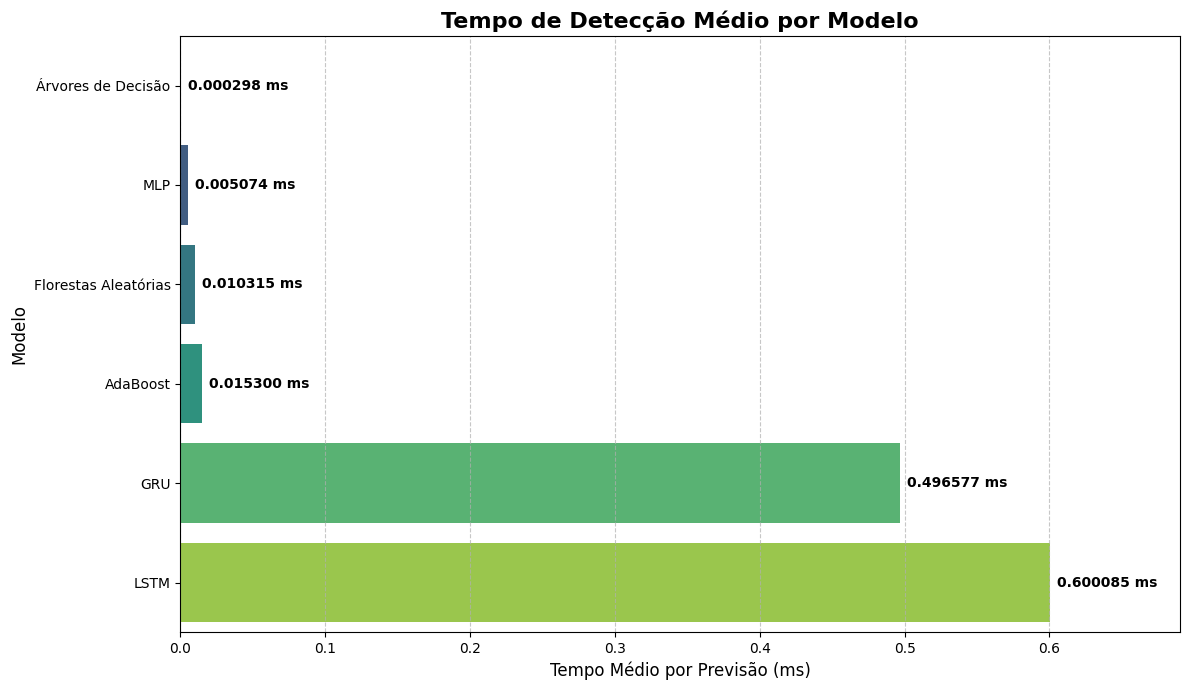

In [ ]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='Tempo de Detecção (ms)',
    y='Modelo',
    data=df_tempos,
    palette='viridis',
    orient='h' 
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.6f} ms',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.title('Tempo de Detecção Médio por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Tempo Médio por Previsão (ms)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, df_tempos['Tempo de Detecção (ms)'].max() * 1.15)
plt.tight_layout()
plt.show()

In [169]:
df_resultados = data_score.copy()

In [170]:
df_resultados.rename(columns={'Algoritmo': 'Algorithm', 'Precisão': 'Precision', 'Acurácia': 'Accuracy', 'Sensibilidade':'Recall'}, inplace=True)
df_resultados.head()

,Accuracy,Precision,Recall,F1-Score
LSTM,0.9754545454545455,0.975603762529719,0.9754545454545455,0.9754255862397115
MLP,"[0.9921212121212121, 0.9939393939393939, 0.990...","[0.9957597716075596, 0.9915172832738686, 0.990...","[0.9945454545454545, 0.9927272727272727, 0.993...","[0.9963641853247713, 0.9921206561478, 0.990904..."
Naive Bayes,"[0.9133333333333333, 0.9206060606060606, 0.909...","[0.9250988474496993, 0.9277623191235757, 0.919...","[0.9133333333333333, 0.9206060606060606, 0.909...","[0.910736325753235, 0.9187926252234531, 0.9063..."
Decision Tree,"[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9981851179673322, 0.9993950393224441, 0.998...","[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9987878782870019, 0.9993939388930625, 0.998..."
Random Forest,"[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939388930625, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [171]:
df_tempos.rename(columns={'Modelo': 'Model', 'Tempo de Detecção (ms)': 'Model Inference (ms)'}, inplace=True)
df_tempos.head(10)

,Model,Model Inference (ms)
2,Árvores de Decisão,0.000298
0,MLP,0.005074
3,Florestas Aleatórias,0.010315
4,AdaBoost,0.015300
1,GRU,0.496577
5,LSTM,0.600085


In [ ]:
df_temp = df_tempos.set_index('Model')
algoritmos_a_remover = ['SVM', 'Naive Bayes']
df_filtrado = df_tempos[~df_tempos['Model'].isin(algoritmos_a_remover)].copy()

In [ ]:
import pandas as pd

nova_ordem = [
    'LSTM',
    'MLP',
    'Árvores de Decisão',
    'Florestas Aleatórias',
    'AdaBoost',
    'GRU'
]
df_reordenado = df_filtrado.set_index('Model')
df_reordenado = df_reordenado.reindex(nova_ordem)
df_reordenado = df_reordenado.reset_index()

print(df_reordenado)

                  Model  Model Inference (ms)
0                  LSTM              0.600085
1                   MLP              0.005074
2    Árvores de Decisão              0.000298
3  Florestas Aleatórias              0.010315
4              AdaBoost              0.015300
5                   GRU              0.496577


In [176]:
dt = pd.concat([df_resultados, df_reordenado['Model Inference (ms)']], axis=1)
dt.head()

,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
LSTM,0.9754545454545455,0.975603762529719,0.9754545454545455,0.9754255862397115,NaN
MLP,"[0.9921212121212121, 0.9939393939393939, 0.990...","[0.9957597716075596, 0.9915172832738686, 0.990...","[0.9945454545454545, 0.9927272727272727, 0.993...","[0.9963641853247713, 0.9921206561478, 0.990904...",NaN
Naive Bayes,"[0.9133333333333333, 0.9206060606060606, 0.909...","[0.9250988474496993, 0.9277623191235757, 0.919...","[0.9133333333333333, 0.9206060606060606, 0.909...","[0.910736325753235, 0.9187926252234531, 0.9063...",NaN
Decision Tree,"[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9981851179673322, 0.9993950393224441, 0.998...","[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9987878782870019, 0.9993939388930625, 0.998...",NaN
Random Forest,"[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939388930625, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN


In [ ]:
mapeamento_nomes = {
    'Decision Tree': 'Árvores de Decisão',
    'Random Forest': 'Florestas Aleatórias'
}

df_resultados.rename(index=mapeamento_nomes, inplace=True)


nova_ordem = [
    'LSTM',
    'MLP',
    'Árvores de Decisão',
    'Florestas Aleatórias',
    'AdaBoost',
    'GRU'
]
inference_series_aligned = df_filtrado.set_index('Model').reindex(nova_ordem)['Model Inference (ms)']

modelos_a_manter = inference_series_aligned.index.tolist()
df_metricas_sincronizadas = df_resultados.reindex(modelos_a_manter)

dt = pd.concat([df_metricas_sincronizadas, inference_series_aligned], axis=1)

print("DataFrame Final Corrigido (dt):")
print(dt)

DataFrame Final Corrigido (dt):
                                                               Accuracy  \
LSTM                                                 0.9754545454545455   
MLP                   [0.9921212121212121, 0.9939393939393939, 0.990...   
Árvores de Decisão    [0.9981818181818182, 0.9993939393939394, 0.998...   
Florestas Aleatórias  [0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
AdaBoost              [0.9842424242424243, 0.9551515151515152, 0.988...   
GRU                   [0.9825757575757575, 0.9939393939393939, 0.994...   

                                                              Precision  \
LSTM                                                  0.975603762529719   
MLP                   [0.9957597716075596, 0.9915172832738686, 0.990...   
Árvores de Decisão    [0.9981851179673322, 0.9993950393224441, 0.998...   
Florestas Aleatórias  [0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
AdaBoost              [0.9842407140415363, 0.9574495746591163, 0.98

In [ ]:
dt.index.name = 'Algorithm'
dt.head(10)

,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
Algorithm,,,,,
LSTM,0.9754545454545455,0.975603762529719,0.9754545454545455,0.9754255862397115,0.600085
MLP,"[0.9921212121212121, 0.9939393939393939, 0.990...","[0.9957597716075596, 0.9915172832738686, 0.990...","[0.9945454545454545, 0.9927272727272727, 0.993...","[0.9963641853247713, 0.9921206561478, 0.990904...",0.005074
Árvores de Decisão,"[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9981851179673322, 0.9993950393224441, 0.998...","[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9987878782870019, 0.9993939388930625, 0.998...",0.000298
Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939388930625, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.010315
AdaBoost,"[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842407140415363, 0.9574495746591163, 0.988...","[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842345497356941, 0.9550273456375433, 0.988...",0.015300
GRU,"[0.9825757575757575, 0.9939393939393939, 0.994...","[0.9826945967412498, 0.99397088669606, 0.99470...","[0.9825757575757575, 0.9939393939393939, 0.994...","[0.9825712333318805, 0.9939441553813464, 0.994...",0.496577


In [ ]:
dt_final_alinhado = dt.reset_index()
dt_final_alinhado.head(6)

,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,LSTM,0.9754545454545455,0.975603762529719,0.9754545454545455,0.9754255862397115,0.600085
1,MLP,"[0.9921212121212121, 0.9939393939393939, 0.990...","[0.9957597716075596, 0.9915172832738686, 0.990...","[0.9945454545454545, 0.9927272727272727, 0.993...","[0.9963641853247713, 0.9921206561478, 0.990904...",0.005074
2,Árvores de Decisão,"[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9981851179673322, 0.9993950393224441, 0.998...","[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9987878782870019, 0.9993939388930625, 0.998...",0.000298
3,Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939388930625, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.010315
4,AdaBoost,"[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842407140415363, 0.9574495746591163, 0.988...","[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842345497356941, 0.9550273456375433, 0.988...",0.015300
5,GRU,"[0.9825757575757575, 0.9939393939393939, 0.994...","[0.9826945967412498, 0.99397088669606, 0.99470...","[0.9825757575757575, 0.9939393939393939, 0.994...","[0.9825712333318805, 0.9939441553813464, 0.994...",0.496577


In [180]:
dt_final_alinhado.insert(0, 'Configuration', 'Configuration 5')
dt_final_alinhado.head()

,Configuration,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,Configuration 5,LSTM,0.9754545454545455,0.975603762529719,0.9754545454545455,0.9754255862397115,0.600085
1,Configuration 5,MLP,"[0.9921212121212121, 0.9939393939393939, 0.990...","[0.9957597716075596, 0.9915172832738686, 0.990...","[0.9945454545454545, 0.9927272727272727, 0.993...","[0.9963641853247713, 0.9921206561478, 0.990904...",0.005074
2,Configuration 5,Árvores de Decisão,"[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9981851179673322, 0.9993950393224441, 0.998...","[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9987878782870019, 0.9993939388930625, 0.998...",0.000298
3,Configuration 5,Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939388930625, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.010315
4,Configuration 5,AdaBoost,"[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842407140415363, 0.9574495746591163, 0.988...","[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842345497356941, 0.9550273456375433, 0.988...",0.015300


In [181]:
dt = dt_final_alinhado.copy()
dt.head(10)

,Configuration,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,Configuration 5,LSTM,0.9754545454545455,0.975603762529719,0.9754545454545455,0.9754255862397115,0.600085
1,Configuration 5,MLP,"[0.9921212121212121, 0.9939393939393939, 0.990...","[0.9957597716075596, 0.9915172832738686, 0.990...","[0.9945454545454545, 0.9927272727272727, 0.993...","[0.9963641853247713, 0.9921206561478, 0.990904...",0.005074
2,Configuration 5,Árvores de Decisão,"[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9981851179673322, 0.9993950393224441, 0.998...","[0.9981818181818182, 0.9993939393939394, 0.998...","[0.9987878782870019, 0.9993939388930625, 0.998...",0.000298
3,Configuration 5,Florestas Aleatórias,"[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993950393224441, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939393939394, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9993939388930625, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.010315
4,Configuration 5,AdaBoost,"[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842407140415363, 0.9574495746591163, 0.988...","[0.9842424242424243, 0.9551515151515152, 0.988...","[0.9842345497356941, 0.9550273456375433, 0.988...",0.015300
5,Configuration 5,GRU,"[0.9825757575757575, 0.9939393939393939, 0.994...","[0.9826945967412498, 0.99397088669606, 0.99470...","[0.9825757575757575, 0.9939393939393939, 0.994...","[0.9825712333318805, 0.9939441553813464, 0.994...",0.496577


In [ ]:
dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 5/all_results_cic2017_conf05.csv')

# Teste do modelo treinado com CIC2017 no dataset CIC 2018

In [ ]:
%run '/poseiddon/GROUP B/CONFIGURATION 5/conf05_CIC2018_script.ipynb'